Este notebook fue extraido de : https://www.kaggle.com/code/sanikamal/data-visualization-using-matplotlib/notebook

In [1]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'iris:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F19%2F420%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240226%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240226T053527Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1b654faf46c3482c57b46c918b3e165489c4f2dcb6ee64c7b40b0d2de6862cb73079ae20fcd468f429bb2591bc8f439e612f10de64ad467bb9b8263de210271ff0eabfd61572f368aff6cd62aab822bfd7e3ea0dcbe2d13bb3bdb98720d96ca483601303b843ee08aae525ca9ac87de701edaa834c350a394ccab653ce8631ab308cd52c03cdf7b4d73021f3d58db4756e823f436ca47b4d44c018dc9618b9d33c98c17c44751f3a62e8c2eb7be9cf50e0b0202172b3c1e6c7c3b4f3b3d9bc2e012dc9e574ea02e52678ba64bcc6c29cce18dd07f6ba79f7ca698bb7c545d0e4b1842b2f6ec05aa1a63e69580869e02428dd47cdacb000856f45b91ed4cce601,stl10:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F30516%2F39470%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240226%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240226T053527Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0559ec98a8998ad5dc1e73fcded47f7c4655f7ebd5eb0994b66563a4f9cb51c370c8d05e13fbbe5d6f721e368162353bf0e12b3cb41f16833fd65b3f07bf93975005b35d28105de8ce3084988449d0be649a9f70e08102fc5d26ea028011c2b810716c7036ad01a62bf8ce95e26ad22100b77c874a78ae1de0b07cbbde9d131cb7ef1278702657f1a74011f98e3df874075e07246700ed1c9226d180a1c13953f9051d7b011fe1cdb85f8c51ad730d77918aae1e60d8516e5322c4b1e197ed3a61d2bae3acd6a0a740416b2e9e2c2a22accc42eb51609a813b00125093368e5d630ef90937ee357f19e557c22d27edf026edd938d16cfe71996625d8d76919ef'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3687 bytes downloaded
Downloaded and uncompressed: iris
[==================================================] 2017846807 bytes downloaded
Downloaded and uncompressed: stl10
Data source import complete.


<h1 style="text-align:center;background-color:skyblue;padding:10px;">Data Visualization usando Matplotlib 📊</h1>
Matplotlib es una biblioteca de Python para realizar gráficos que produce figuras de calidad de publicación en una variedad de formatos impresos y entornos interactivos en múltiples plataformas.

Matplotlib busca hacer que las cosas simples sean fáciles y que las cosas difíciles sean posibles. Puedes generar gráficos, histogramas, espectros de potencia, gráficos de barras, gráficos de errores, gráficos de dispersión, etc., con solo unas pocas líneas de código.

La biblioteca matplotlib contiene varios módulos. Por ejemplo, el módulo matplotlib.table incluye herramientas para construir tablas, el módulo matplotlib.text para incluir texto en una figura, y el módulo matplotlib.colorbar te permite visualizar un conjunto de valores escalares en color. El módulo matplotlib.pyplot está diseñado para crear gráficos coloridos.

<h1 style="text-align:center;background-color:skyblue;padding:10px;">Tabla de Contenidos</h1>

- Instalación
- Empezar con Pyplot
    - Gráfico de la población mundial
    - Agregar etiquetas y color de línea personalizado
    - Leyendas, títulos y etiquetas
    - Múltiples líneas y estilos de línea
    - Configuración del gráfico
- El gráfico circular (pie chart)
- El gráfico de rosquilla (doughnut chart)
- El mapa de calor (heatmap)
- El gráfico de barras (bar chart)
- El histograma
- El gráfico de dispersión (scatter plot)
- El diagrama de caja (box plot)
- El gráfico de áreas apiladas (stack plot)
- Gráficos 3D
- Gráfico de dispersión 3D
- Gráfico de barras 3D
- Graficar imágenes

<h1 style="text-align:center;background-color:skyblue;padding:10px;">Instalación</h1>

En Windows, Linux y distribuciones macOS, matplotlib y la mayoría de sus dependencias están disponibles como paquetes "wheel". Ejecuta el siguiente comando para instalar el paquete matplotlib
```pip install matplotlib```

**Importing matplotlib**

```from matplotlib import pyplot as plt```

Ó

```import matplotlib.pyplot as plt ```

<h1 style="text-align:center;background-color:skyblue;padding:10px;">Importando Paquetes Esenciales</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import os
# os.listdir('../input')

<h1 style="text-align:center;background-color:skyblue;padding:10px;">Verificar la Versión de Paquetes</h1>

In [3]:
# Check matplotlib version
print(matplotlib.__version__)
print(pd.__version__)
print(np.__version__)

3.7.1
1.5.3
1.25.2


<h1 style="text-align:center;background-color:skyblue;padding:10px">Empezando con Pyplot</h1>
Pyplot es un módulo de Matplotlib que proporciona funciones simples para agregar elementos gráficos, como líneas, imágenes, texto, etc., a los ejes en la figura actual.

Comencemos con un gráfico simple que utiliza código fundamental de Matplotlib.

```fig, ax = plt.subplots() # this creates a figure paired with axes```




Matplotlib emplea una estructura jerárquica, con un objeto figure en la parte superior. Una figura es un contenedor que consta de muchos elementos diferentes, incluidos ejes. Una figura puede cambiar el tamaño del gráfico, gestionar títulos y leyendas entre otras cosas. Un axis es un objeto que toma datos y los visualiza en el gráfico; una figura puede tener varios ejes que corresponden a diferentes subgráficos.

Ahora creemos nuestro primer gráfico:

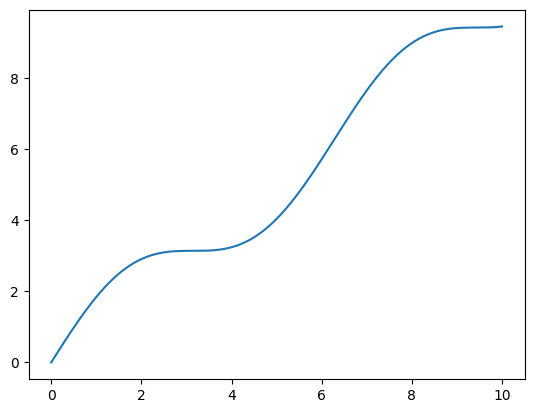

In [4]:
fig, ax = plt.subplots()
# x data
x = np.linspace(0, 10, 300)
# y data
y = np.sin(x) + x
# creates the plot
ax.plot(x, y)
# this will show your plot in case your environment is not interactive
fig.show()

Hay otra manera de crear una figura en `matplotlib`:

```python
plt.figure()
```

Este código parece un poco más simple, pero esa es la única ventaja. Muchas veces, necesitas dibujar varios gráficos sucesivos. Matplotlib utiliza el concepto de "figura activa". Supongamos que necesitamos implementar `plt.figure(num)` en nuestro programa. En este caso, crea una nueva figura, la asigna con un número `num` y la activa. Si queremos volver a uno de los gráficos anteriores, necesitamos referirnos a la figura específica en lugar de crear una nueva. Para hacerlo, necesitamos hacer un seguimiento de su número, digamos, 7, y activar la figura deseada con el comando `plt.figure(7)`.

Además, la función `plt.subplots()` es crucial cuando quieres crear un gráfico que consta de varias partes.

## Configuración del Gráfico

Ahora personalicemos nuestro gráfico y aprendamos algunas de las configuraciones básicas.

El argumento `figsize` establece la `longitud` y el `ancho` de la figura:

```python
fig, ax = plt.subplots(figsize=(15,10))
```

El método `suptitle` establece el `título` de la figura.

```python
fig.suptitle('Nuestro primer gráfico', fontsize=40)
```

También podemos establecer el `color`, `estilo` y `ancho` de la línea. Para cambiar la apariencia de la línea, se utiliza `linestyles`. Un ancho adicional hará que nuestra línea sea un poco más gruesa para una mejor apariencia visual.

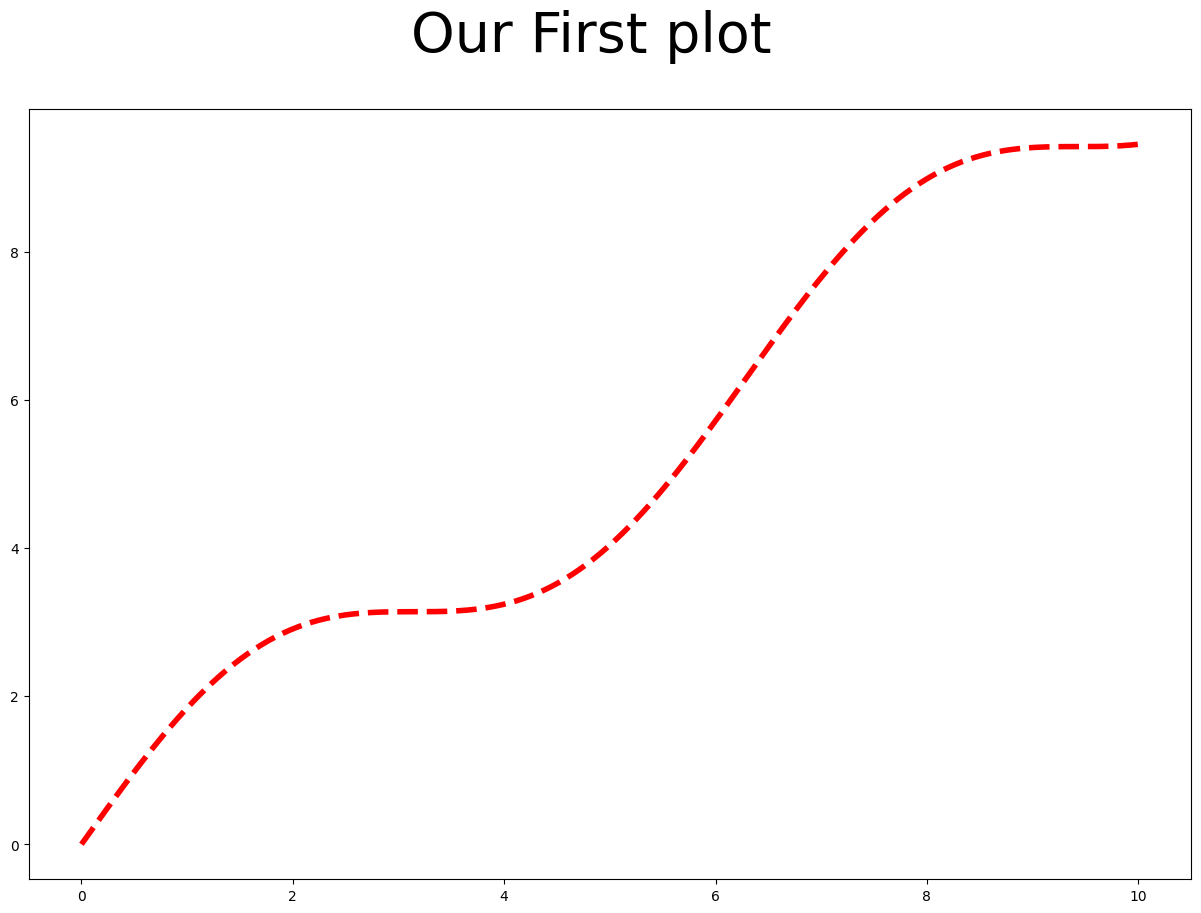

In [5]:
color = 'r'
linestyle = 'dashed'
linewidth = 4
fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle('Our First plot', fontsize=40)
ax.plot(x, y, c=color, linestyle=linestyle, linewidth=linewidth)
plt.show()

### Configuración de Ejes
Echemos un vistazo a algunas de las propiedades de la clase Axes. Para nombrar nuestros ejes `x` e `y`, podemos pasar cualquier argumento de palabra clave:

```python
ax.set_ylabel('función', fontsize=30)
ax.set_xlabel('argumento', fontsize=30)
```

El objeto Axes tiene dos objetos secundarios: `xaxis` e `yaxis`. Cada uno de ellos tiene sus propias marcas con etiquetas vinculadas, en nuestro caso, los números bajo la línea del eje. Posteriormente, podemos iterar a través de ellos, cambiando su `tamaño`:

```python
for xtick in ax.xaxis.get_major_ticks():
    xtick.label.set_fontsize(18)

for ytick in ax.yaxis.get_major_ticks():
    ytick.label.set_fontsize(18)
```

<ipython-input-6-39efad964a1c>:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  xtick.label.set_fontsize(18)
<ipython-input-6-39efad964a1c>:10: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  ytick.label.set_fontsize(34)


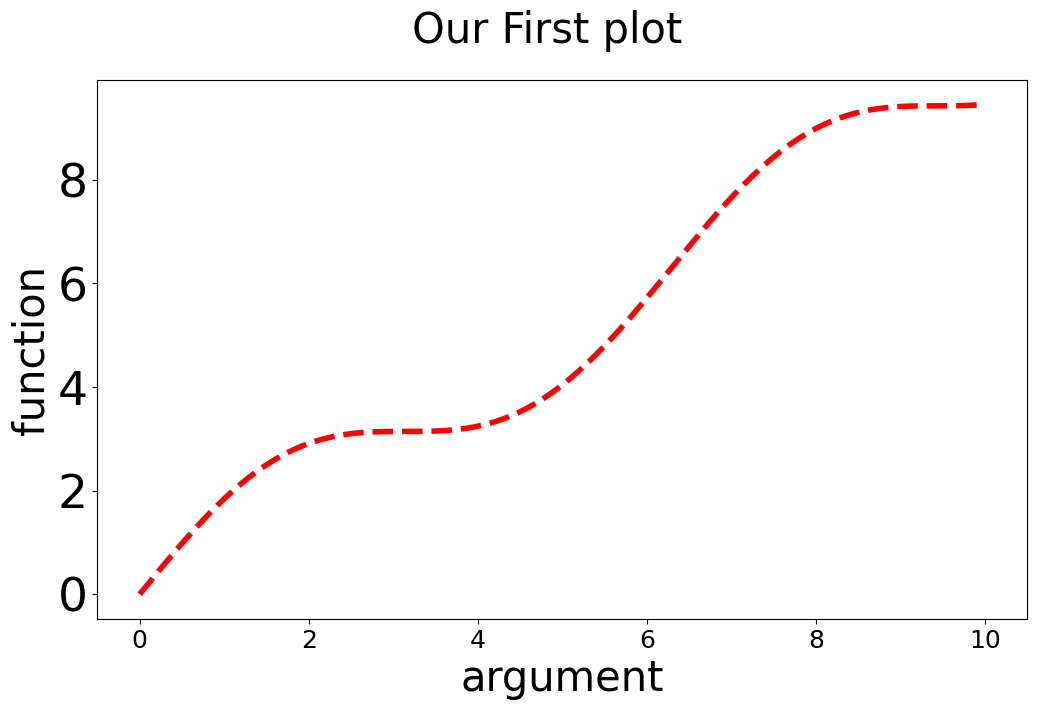

In [6]:
fig, ax = plt.subplots(figsize=(12,7))
fig.suptitle('Our First plot', fontsize=30)
ax.plot(x, y, c=color, linestyle=linestyle, linewidth=linewidth)
ax.set_ylabel('function', fontsize = 30)
ax.set_xlabel('argument', fontsize = 30)
for xtick in ax.xaxis.get_major_ticks():
    xtick.label.set_fontsize(18)

for ytick in ax.yaxis.get_major_ticks():
    ytick.label.set_fontsize(34)
plt.show()

## 🎗️ Recordatorio
Es una buena práctica cerrar las ventanas de las figuras cuando no las necesitamos. Esto mantiene el código limpio y ahorra mucha memoria. Para hacer esto, podemos usar el comando `plt.close(fig)`. Usa el comando `plt.close()` para cerrar todas las ventanas de figuras abiertas. Si necesitas eliminar una figura específica, incluidos los ejes asociados con datos, utiliza `fig.clf()`. Esto borra el contenido de la figura pero deja abierta la ventana de la figura.

### Múltiples subgráficos

El método `plt.subplots()` es la mejor manera de manejar varios subgráficos a la vez. Creemos un gráfico en tres partes:

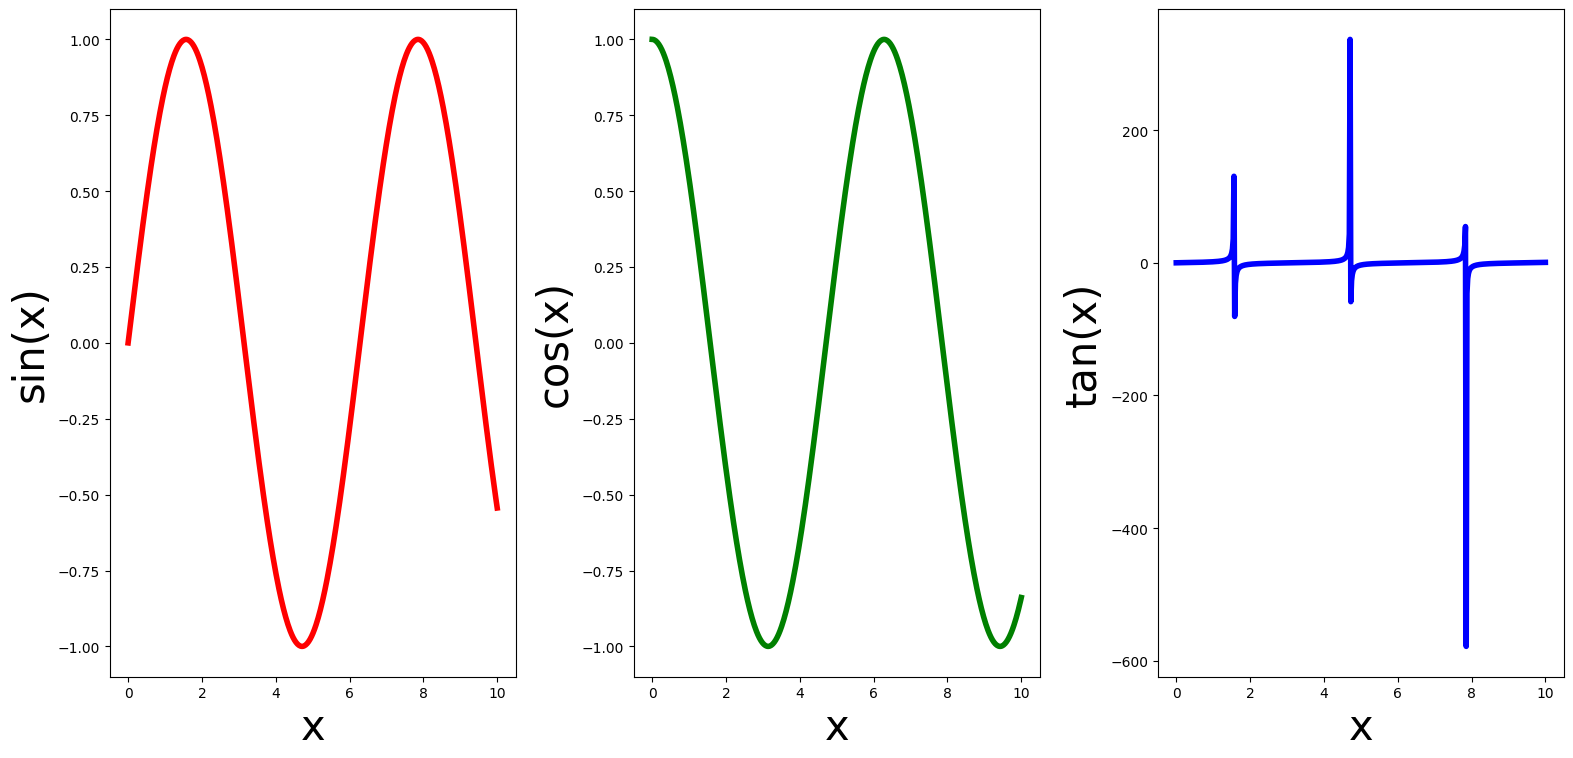

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(16,8))
ax1, ax2, ax3 = axes
x = np.linspace(0,10,500)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

ax1.set_ylabel('sin(x)', fontsize=30)
ax1.set_xlabel('x', fontsize=30)
ax2.set_ylabel('cos(x)', fontsize=30)
ax2.set_xlabel('x', fontsize=30)
ax3.set_ylabel('tan(x)', fontsize=30)
ax3.set_xlabel('x', fontsize=30)
fig.tight_layout(pad=2)

ax1.plot(x, y1, c='r', linewidth=4)
ax2.plot(x, y2, c='g', linewidth=4)
ax3.plot(x, y3, c='b', linewidth=4)
plt.show()

## Algun otro ejemplo
### Gráfico de Población Mundial

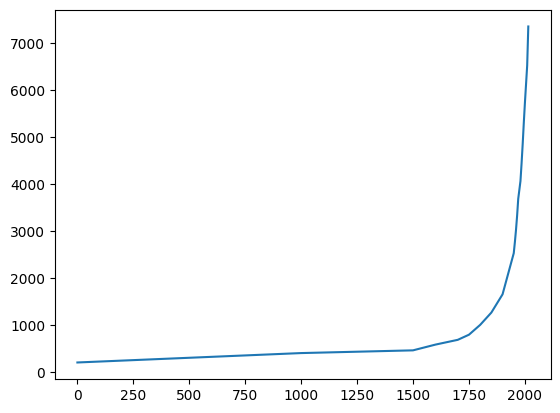

In [8]:
years=[1,1000,1500,1600,1700,1750,1800,1850,1900,1950,1955,1960,1965,1970,1980,1985,1990,
       1995,2000,2005,2010,2015]
pops=[200,400,458,580,682,791,1000,1262,1650,2525,2758,3018,3322,3682,
      4061,4440,4853,5310,5735,6127,6520,7349]
plt.plot(years,pops)
plt.show()

###  Añade etiquetas y color personalizado

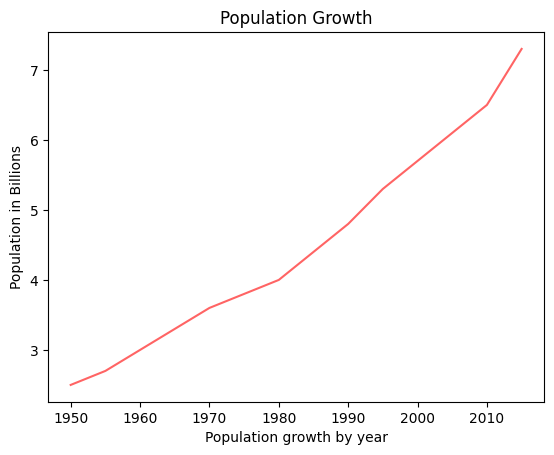

In [9]:
years=[1950,1955,1960,1965,1970,1980,1985,1990,1995,2000,2005,2010,2015]
pops=[2.5,2.7,3.0,3.3,3.6,4.0,4.4,4.8,5.3,5.7,6.1,6.5,7.3]
plt.plot(years,pops,color=(255/255,100/255,100/255))
plt.ylabel("Population in Billions")
plt.xlabel("Population growth by year")
plt.title("Population Growth")
plt.show()

### Leyendas, Titulos y etiquetas

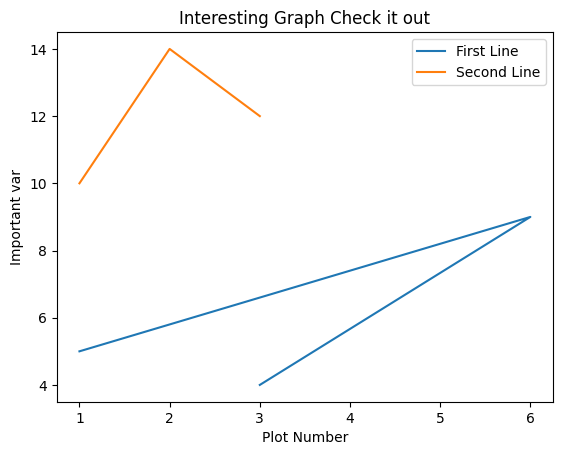

In [10]:
x = [1,6,3]
y = [5,9,4]

x2 = [1,2,3]
y2 = [10,14,12]

plt.plot(x, y, label='First Line')
plt.plot(x2, y2, label='Second Line')
plt.xlabel('Plot Number')
plt.ylabel('Important var')
plt.title('Interesting Graph Check it out')
plt.legend()
plt.show()

### Multiples lineas y estilos



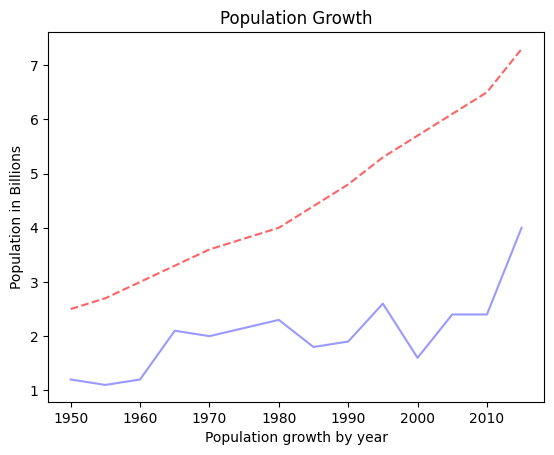

In [11]:
years=[1950,1955,1960,1965,1970,1980,1985,1990,1995,2000,2005,2010,2015]
pops=[2.5,2.7,3.0,3.3,3.6,4.0,4.4,4.8,5.3,5.7,6.1,6.5,7.3]
death=[1.2,1.1,1.2,2.1,2.0,2.3,1.8,1.9,2.6,1.6,2.4,2.4,4.0]
plt.plot(years,pops,'--',color=(255/255,100/255,100/255))
plt.plot(years,death,color=(.6,.6,1))
plt.ylabel("Population in Billions")
plt.xlabel("Population growth by year")
plt.title("Population Growth")
plt.show()

### Configuring the graph

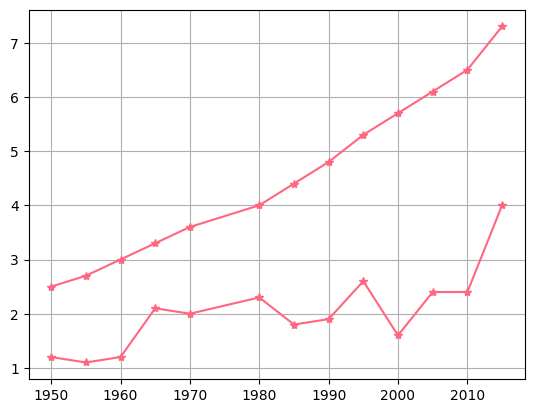

In [12]:
years=[1950,1955,1960,1965,1970,1980,1985,1990,1995,2000,2005,2010,2015]
pops=[2.5,2.7,3.0,3.3,3.6,4.0,4.4,4.8,5.3,5.7,6.1,6.5,7.3]
death=[1.2,1.1,1.2,2.1,2.0,2.3,1.8,1.9,2.6,1.6,2.4,2.4,4.0]
lines=plt.plot(years,pops,years,death)
plt.grid(True)
plt.setp(lines,color=(1,.4,.5),marker='*')
plt.show()

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The pie chart</h1>

A `pie chart` is a circular plot that shows how data items relate to one another. The `pie chart` total area is the data percentage. The area of `slices` (also called `wedges`) represents the percentage of data parts and shows the relation between them. `Pie charts` are good when we need to compare parts of a whole.

### Creating a pie chart
To create a pie chart using matplotlib, refer to the pie`() function`.

```plt.pie(data)```

where `data` is an array of data values that you want to plot.

There are many other optional parameters that can pass to `plt.pie()`. Some of them include:

- `explode` allows separating slices of a pie chart
- `labels` is a list of strings that sets the label of each corresponding slice
- `labeldistance` determines the radial distance at which pie labels are drawn (default is `1.1`)
- `color` colors slices
- `shadow` creates the shadow of a slice
- `startangle` lets you choose the starting angle of a plot
- `wedgeprops` lets you tune various slice parameters
- `radius` sets the radius of the circle(by default, it is `1`)

Let's create simple pie chart. Assume our data represents the result of a survey on a favorite programming language:

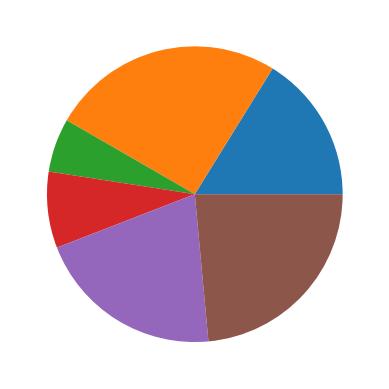

In [13]:
data=[33,52,12,17,42,48]
plt.pie(data)
plt.show()

### Labels
Adding labels to a pie chart is pretty straightforward just need to pass a list of strings with labels corresponding to the list of values:

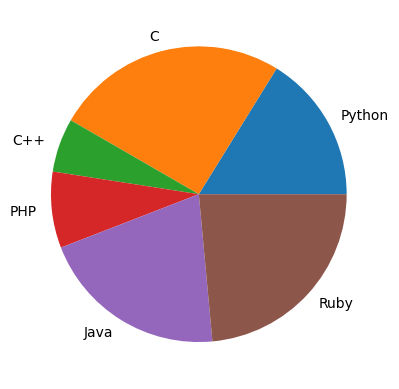

In [14]:
labels=['Python','C','C++','PHP','Java','Ruby']
plt.pie(data,labels=labels)
plt.show()

Now let's customize the pie chart with adding a legend and title the whole graph.

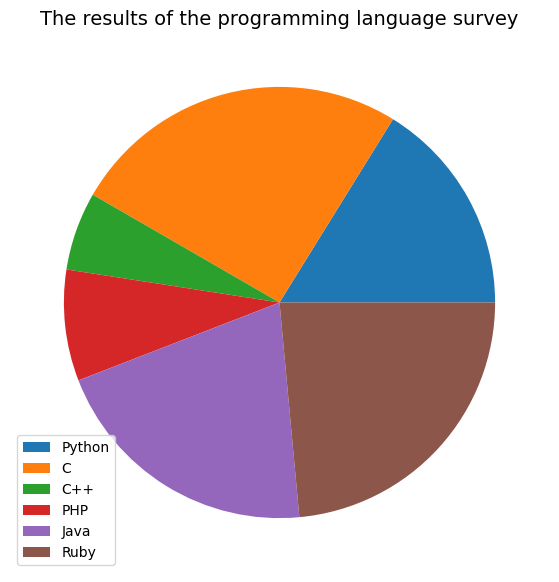

In [15]:
plt.figure(figsize=(9, 7))
plt.pie(data)
plt.title('The results of the programming language survey', fontsize=14)
plt.legend(labels)
plt.show()

### Explode
The `explode` parameter in `pie charts` separates a slice from the main pie. To highlight some of the fractions, we need to pass a list of values to the explode parameter. The values determine how far we want to separate this category from the main pie.

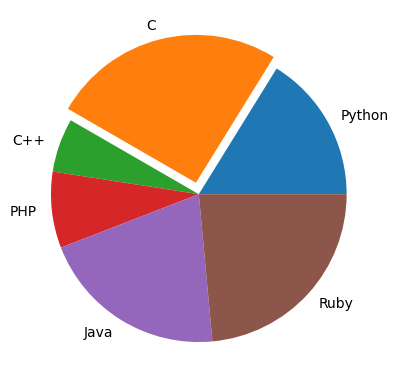

In [16]:
explode = [0.0, 0.08, 0.0, 0.0,0.0,0.0]
plt.pie(data, explode=explode, labels=labels)
plt.show()

### Colors and shadows
To make our graph even more illustrative, we can pass a list of colors to the color parameter and add a shadow underneath by setting the `shadow` to `True`:

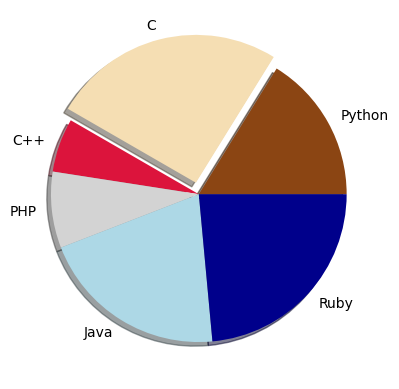

In [17]:
colors = ['saddlebrown', 'wheat', 'crimson', 'lightgrey','lightblue','darkblue']
plt.pie(data,
        explode=explode,
        labels=labels,
        colors=colors,
        shadow=True)
plt.show()

### Display the value
The `autopct` parameter displays the percent value on the slices.
If `autopct` is `%.2f`, then for each pie slice, the format string is `%.2f`, where `% `is a special character that tells when to type the value, `f` sets the result to be a floating-point type, and the `.2` sets a limit to only 2 digits after the point.

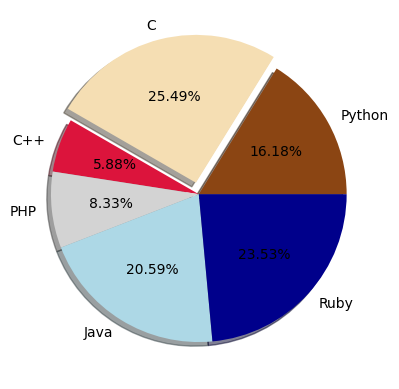

In [18]:
plt.pie(data,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%.2f%%',    # here we also add the % sign
        shadow=True)
plt.show()

### Starting angle
By default, pie charts are plotted from the x-axis; slices are plotted counterclockwise:

The `startangle` parameter lets us define the angle where we want to initiate our pie (the default angle is 0). You can choose whether you want to plot the slices counterclockwise by changing the counterclock parameter; it is `True by` default.

Let's assume we want the slices to start at 90 degrees.

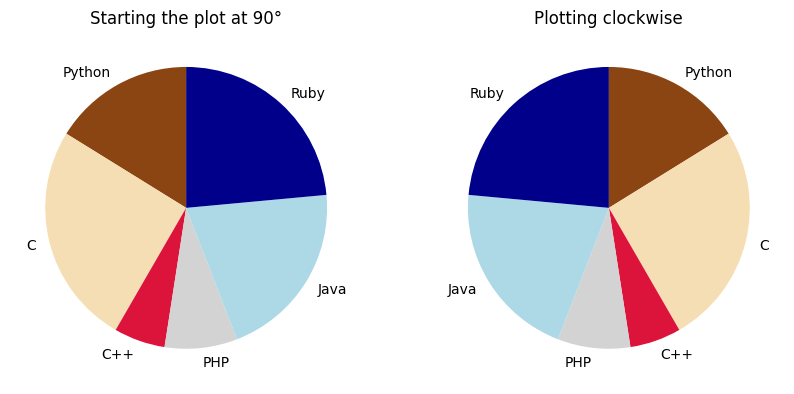

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax1, ax2 = axes

ax1.pie(data, labels=labels, colors=colors, startangle=90)
ax2.pie(data, labels=labels, colors=colors, startangle=90, counterclock=False)
ax1.set_title('Starting the plot at 90°')
ax2.set_title('Plotting clockwise')
plt.show()

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The doughnut chart</h1>
A doughnut chart is very similar to a pie chart. However, since a doughnut chart has an opening at the center, it makes slices look more like bars.
Unfortunately, there is no specific method for plotting a doughnut chart in the matplotlib library. But we can use the `wedgeprops` parameter to define the width of the wedges.

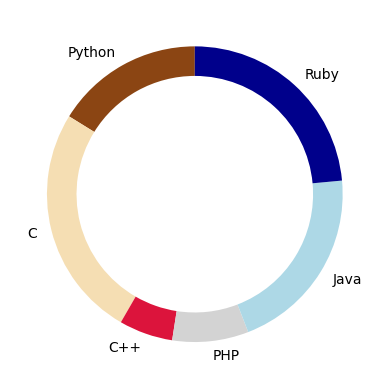

In [20]:
plt.pie(data,
        labels=labels,
        colors=colors,
        startangle=90,
        wedgeprops={'width': 0.2})
plt.show()

The `wedgeprops` parameter also lets we change various pie slice features, such as `linewidth`, `edgecolor`, `alpha` (for transparency), and many others.

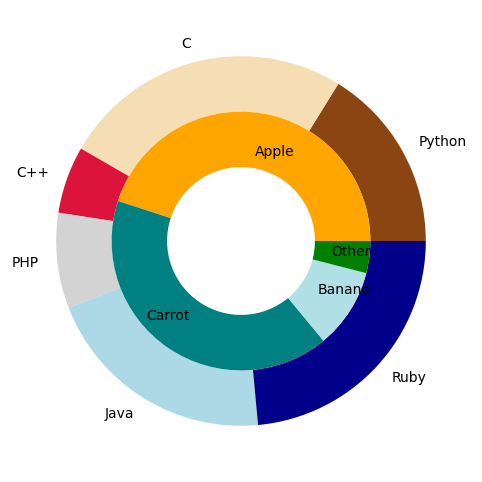

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.3

p_pie = ax.pie(data,radius=1,labels=labels, colors=colors,wedgeprops = {'width': width})

pets_data = [45, 41, 10, 4]
pets_labels = ['Apple', 'Carrot', 'Banana', 'Other']
pets_colors = ['orange', 'teal', 'powderblue', 'green']
pets_pie = ax.pie(pets_data,
                  radius=1-width,
                  labels=pets_labels,
                  labeldistance=0.7,
                  colors=pets_colors,
                  wedgeprops = {'width': width})

plt.show()

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The heatmap</h1>

A `heatmap` is a graph that extensively uses color for data visualization. The colors depend on several independent variables. There are two different kinds of heatmap: a `cluster heatmap` (a cell-matrix of different colors) and a `spatial heatmap` (it has no cells; the variable variation is considered continuous).

### Dealing with data
First, we need to prepare the data we want to plot. In this case, we've chosen the [Iris Species dataset](https://www.kaggle.com/uciml/iris). It includes three iris species with 50 samples each as well as some properties about each flower.

In [22]:
df = pd.read_csv('../input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Heatmaps are popular as correlation plots. We'll see whether there's a correlation between the SepalLength, SepalWidth,PetalLength parameters, and PetalWidth.

In [23]:
df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### A Simple heatmap
There are several functions in `matplotlib` that you can use to create a `heatmap`. we'll focus on `plt.imshow()`. The only argument it requires is `X` – a dataset to a plot:

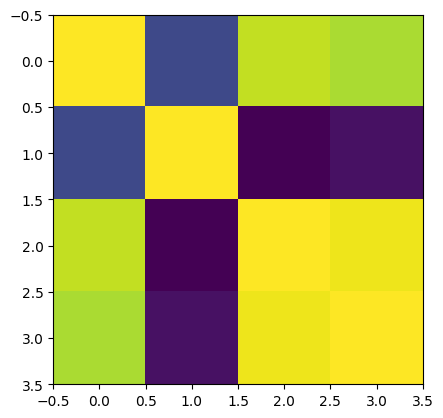

In [24]:
plt.imshow(df.corr())

A dataset can be either a positional or a keyword argument, so you can type `plt.imshow(X=df.corr())` or `plt.imshow(df.corr())` — the result would be the same.

There iss another important argument this function can take — `interpolation`. It takes a `str` that specifies an interpolation we want on our plot. The default value is `None`.

### Changing color and size
Let's add a `color bar`, a scale that specifies the meaning of colors in our plot. All we need for that is the `plt.colorbar()` function without any arguments.By default, a color bar is a vertical line on the right side of the plot. If you want to put it beneath the heatmap, you can use the optional argument `orientation` and set it as `orientation='horizontal'`.

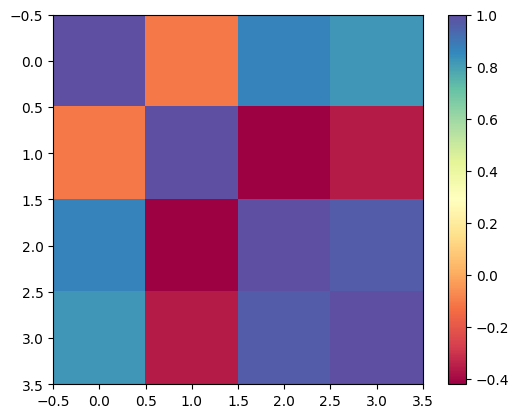

In [25]:
plt.imshow(df.corr(), cmap="Spectral")
plt.colorbar()
plt.show()

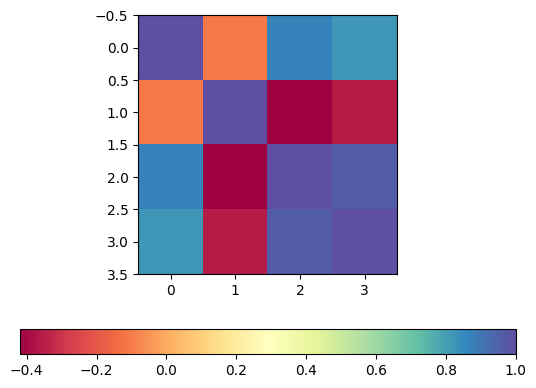

In [26]:
plt.imshow(df.corr(), cmap="Spectral")
plt.colorbar(orientation='horizontal')
plt.show()

We can also change the size of plot just need the `plt.gcf().set_size_inches()` function it takes two integers as its arguments.

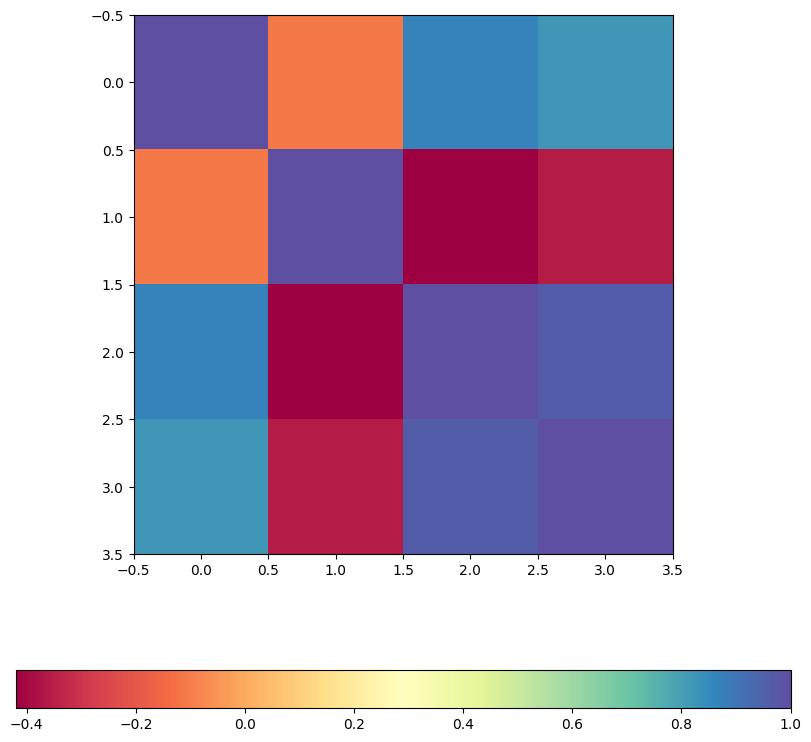

In [27]:
plt.imshow(df.corr(), cmap="Spectral")
plt.colorbar(orientation='horizontal')
plt.gcf().set_size_inches(10, 10)
plt.show()

### Adding labels
We can also add labels to our plot to make it more comprehensive. To add them to the plot, use functions `plt.xticks()` and `plt.yticks()` for `X`- and `Y`-axes.

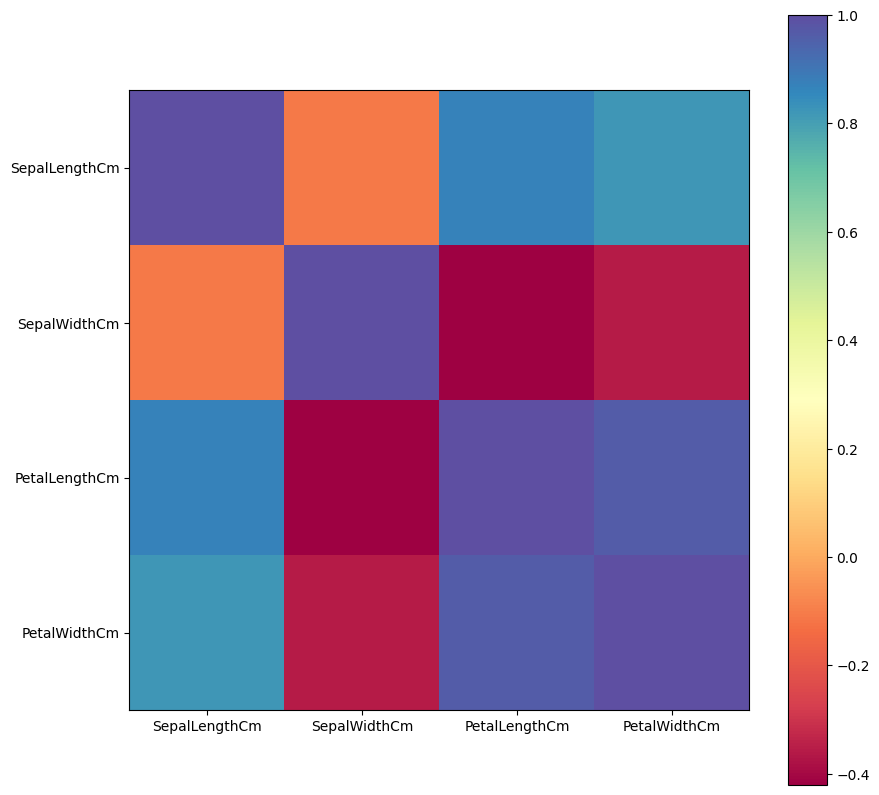

In [28]:
plt.imshow(df.corr(), cmap="Spectral")
plt.colorbar()
plt.gcf().set_size_inches(10, 10)
plt.xticks(range(len(df.corr().columns)), df.corr().columns)
plt.yticks(range(len(df.corr().columns)), df.corr().columns)
plt.show()

Now let's add values to cells and add a title to our plot.

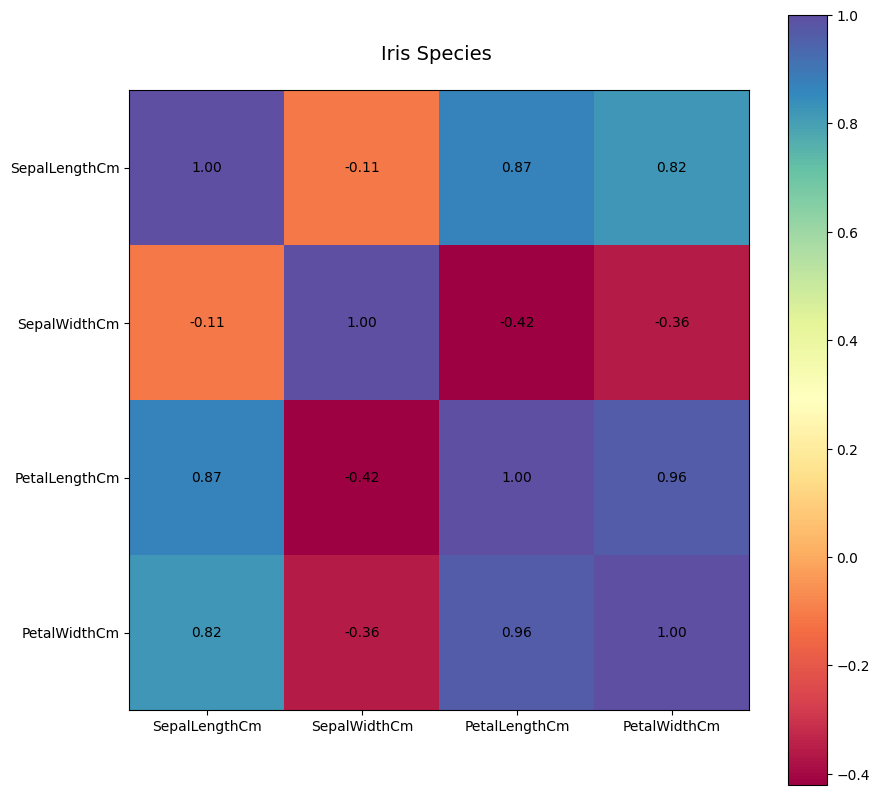

In [29]:
plt.imshow(df.corr(), cmap="Spectral")
plt.colorbar()
plt.gcf().set_size_inches(10, 10)
plt.xticks(range(len(df.corr().columns)), df.corr().columns)
plt.yticks(range(len(df.corr().columns)), df.corr().columns)
labels = df.corr().values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        plt.text(a, b, '{:.2f}'.format(labels[b, a]), ha='center', va='center', color='black')
plt.title('Iris Species \n', fontsize=14)
plt.show()

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The bar chart</h1>
A bar chart is a diagram where variables are represented as rectangular bars the taller or longer the bar, the higher value it represents. Usually, one axis of a bar chart represents a category, and the other is its value. A bar chart is used to compare discrete data, such as occurrences or proportions.

### Creating a bar chart
To create a bar chart with `matplotlib`, simply need to call the `bar()` function. The syntax for this method is as follows:

`plt.bar(x, height, width, bottom, align)`

where:

`x` is a category

`height` is the corresponding value.

`width` is how wide you want your bars(default value is `0.8`).

`bottom` is the base of the y-coordinate; in other words, it is the point where your bars start. The (default is `0`)

`align` is where you want to place your category names. By default, they are positioned at the bar center

Let's create our first simple bar graph. Suppose you want to compare the box office of the movies released in 2020 in the India.

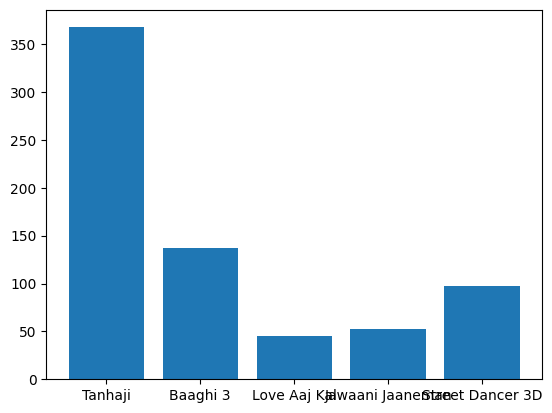

In [30]:
films = ['Tanhaji', 'Baaghi 3', 'Love Aaj Kal', 'Jawaani Jaaneman', 'Street Dancer 3D']
box_office = [367.65, 137.05, 44.77, 52.63, 97]
plt.bar(films, box_office)
plt.show()

### Labels
Let's make chart more illustrative adding labels and title.

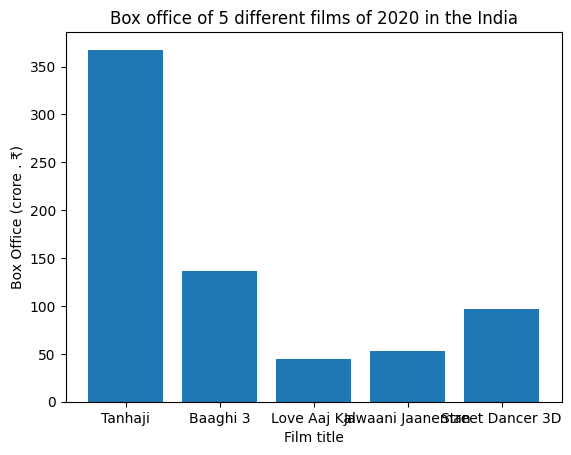

In [31]:
plt.bar(films, box_office)

plt.ylabel('Box Office (crore . ₹)')  # labling y-axis
plt.xlabel('Film title')           # labling x-axis
plt.title('Box office of 5 different films of 2020 in the India')
plt.show()

### Gridlines
Another way to make chart more representative is adding gridlines. To add gridline call the `grid()` method and pass it as the parameters for `color`, `linestyle`, `width`, and `axis`. To make gridlines transparent need to tweak the alpha parameter. It can range from `0.0` to `1.0`.

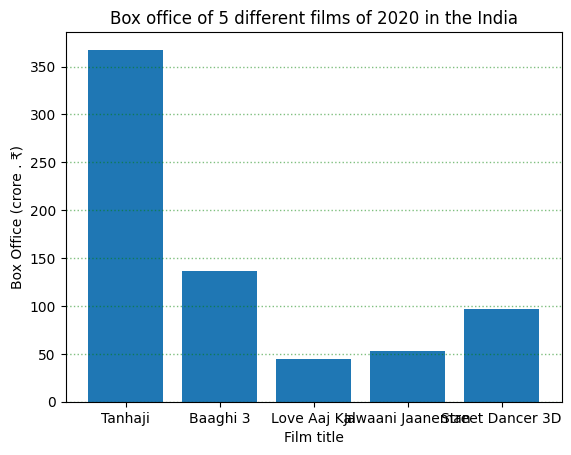

In [32]:
plt.bar(films, box_office)

# add grid lines
plt.grid(color='green', linestyle=':', linewidth=1.0, axis='y', alpha=0.5)

plt.ylabel('Box Office (crore . ₹)')  # labling y-axis
plt.xlabel('Film title')           # labling x-axis
plt.title('Box office of 5 different films of 2020 in the India')

plt.show()

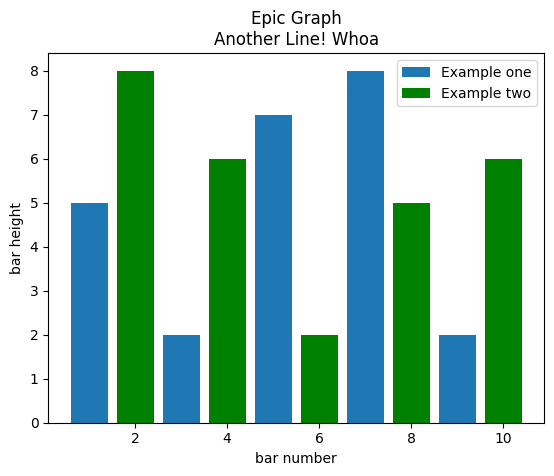

In [33]:
plt.bar([1,3,5,7,9],[5,2,7,8,2], label="Example one")
plt.bar([2,4,6,8,10],[8,6,2,5,6], label="Example two", color='g')
plt.legend()
plt.xlabel('bar number')
plt.ylabel('bar height')

plt.title('Epic Graph\nAnother Line! Whoa')

plt.show()

## Horizontal bar chart
A bar chart can be display horizontally instead of vertically, just need to call the `barh()` function. But don't forget to switch the axes labels!

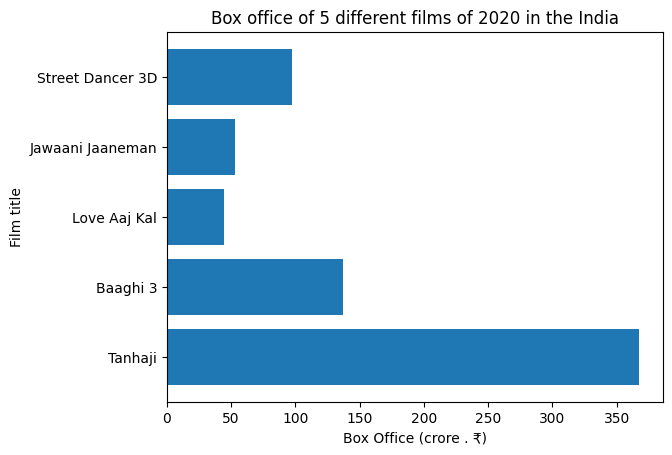

In [34]:
# plotting the chart horizontally
plt.barh(films, box_office)

plt.xlabel('Box Office (crore . ₹)')
plt.ylabel('Film title')
plt.title('Box office of 5 different films of 2020 in the India')

plt.show()

## Grouped bar plot
Plotting multiple bars next to each other can come in handy when we need to compare two or more data series that share categories.

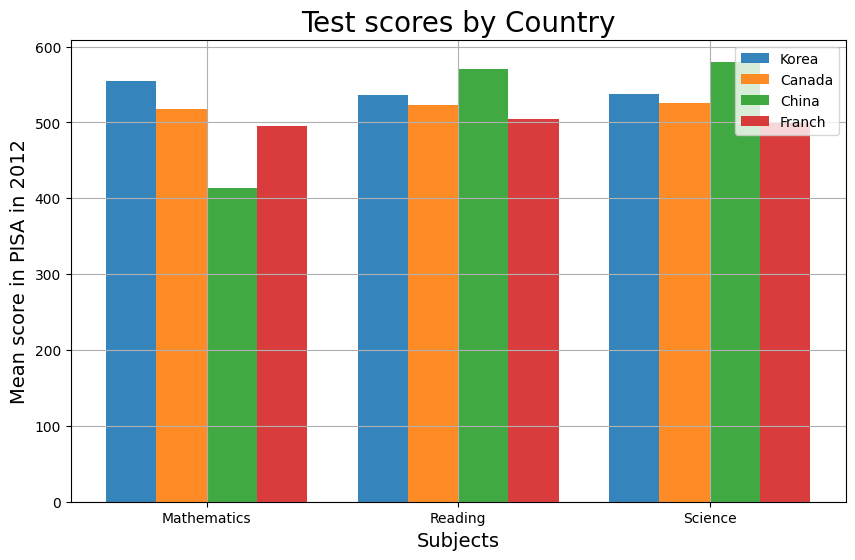

In [35]:
korea_scores=(554,536,538)
canada_scores=(518,523,525)
china_scores=(413,570,580)
franch_scores=(495,505,499)

index=np.arange(3)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,korea_scores,bar_width,alpha=.9,label="Korea")
c1=plt.bar(index+bar_width,canada_scores,bar_width,alpha=.9,label="Canada")
ch1=plt.bar(index+bar_width*2,china_scores,bar_width,alpha=.9,label="China")
f1=plt.bar(index+bar_width*3,franch_scores,bar_width,alpha=.9,label="Franch")

plt.xticks(index+.6/2,('Mathematics','Reading','Science'))
plt.ylabel('Mean score in PISA in 2012',fontsize=14)
plt.xlabel('Subjects',fontsize=14)
plt.title('Test scores by Country',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

## Stacked bar plot

A stacked bar chart is a type of graph that displays multiple data points on top of each other. In a stacked bar chart, each bar represents a single category that contains smaller categories. Use it to demonstrate how parts relate to the total amount.

In stacked bar plots need to provide the additional bottom parameter that indicates where the bar should start.

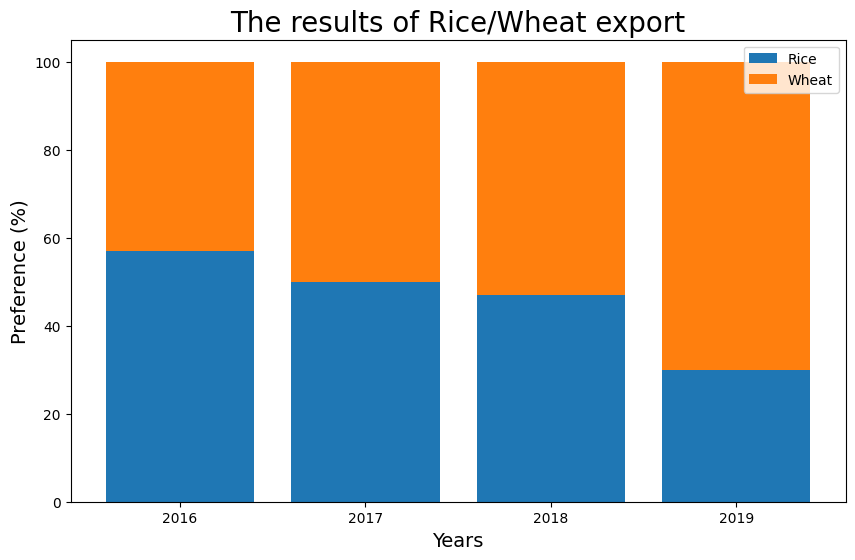

In [36]:
years = ['2016', '2017', '2018', '2019']
rice = [57, 50, 47, 30]
wheat = [43, 50, 53, 70]

plt.figure(figsize=(10, 6))

plt.bar(years, rice, label='Rice')
plt.bar(years, wheat, bottom=rice, label='Wheat')

plt.xlabel('Years', fontsize=14)
plt.ylabel('Preference (%)', fontsize=14)
plt.title('The results of Rice/Wheat export', fontsize=20)
plt.legend()
plt.show()

If you need to stack three or more categories, provide a sum of the previous category values to the bottom parameter.

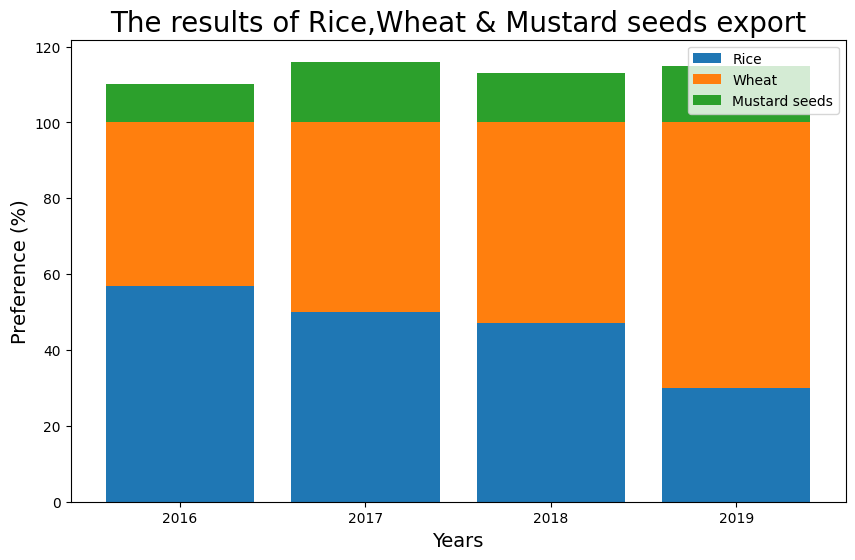

In [37]:
years = ['2016', '2017', '2018', '2019']
rice =  np.array([57, 50, 47, 30])
wheat =  np.array([43, 50, 53, 70])
mustard =  np.array([10, 16, 13, 15])

plt.figure(figsize=(10, 6))

plt.bar(years, rice, label='Rice')
plt.bar(years, wheat, bottom=rice, label='Wheat')
plt.bar(years, mustard, bottom=rice+wheat, label='Mustard seeds')

plt.xlabel('Years', fontsize=14)
plt.ylabel('Preference (%)', fontsize=14)
plt.title('The results of Rice,Wheat & Mustard seeds export', fontsize=20)
plt.legend()
plt.show()

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The Histogram</h1>
    
    
A `histogram` is a graphical display of data that organizes groups of data points into ranges. These ranges are represented by bars. It resembles a bar chart, but it's not quite the same. The key difference is that you use a bar chart for categorical data representation, while a histogram displays only numerical data. Examples of this might be age groups, or scores on a test. Rather than showing every single age a group might be, maybe you just show people from 20-25, 25-30... and so on.
    


### Creating a simple histogram

Let's say you've decided to plot the height of your classmate. Now, let's create a very simple histogram with only 10 values:

(array([3., 0., 1., 2., 1., 0., 2., 0., 0., 1.]),
 array([163. , 165.7, 168.4, 171.1, 173.8, 176.5, 179.2, 181.9, 184.6,
        187.3, 190. ]),
 <BarContainer object of 10 artists>)

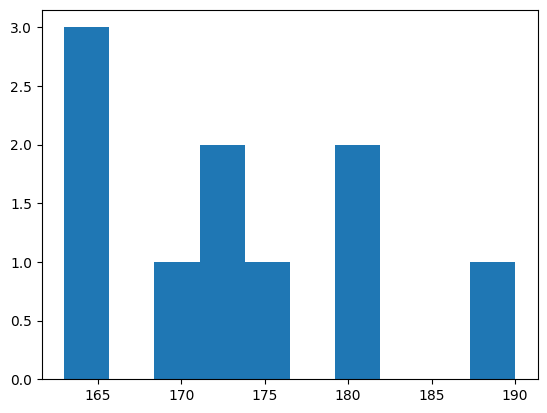

In [38]:
data = [163, 163, 164, 170, 180, 172, 173, 190,175,180]
plt.hist(data)

To make it clearer, we need to specify the values for `plt.title()`, `plt.xlabel()`, and `plt.ylabel()`. The color can be change by using the color argument and adding a border between adjacent bars with `edgecolor`.

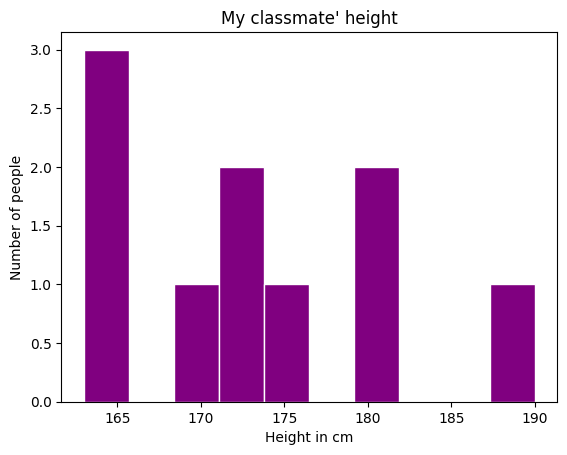

In [39]:
plt.hist(data, color="purple", edgecolor="white")
plt.title("My classmate' height")
plt.ylabel("Number of people")
plt.xlabel("Height in cm")
plt.show()

### Changing bins

Let's say we want to divide our data values into 3 groups: from 160 to 170 cm, from 170 to 180, and from 180 to 190. To do that, we need to pass a list of these values to the bins argument:

(array([3., 4., 3.]),
 array([160., 170., 180., 190.]),
 <BarContainer object of 3 artists>)

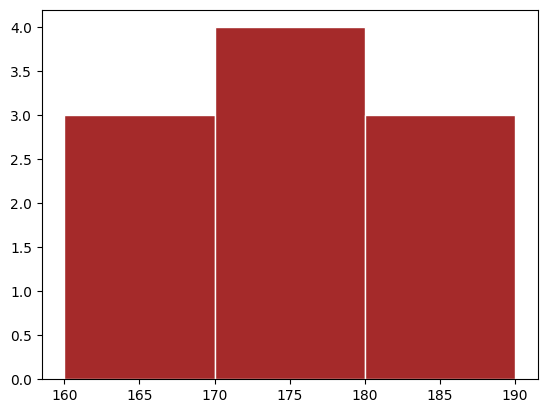

In [40]:
bins = [160, 170, 180, 190]
plt.hist(data, bins=bins, color="brown", edgecolor='white')

The `bins` argument can take not only a `list` but also an `int`. A `list` defines bin edges. An `int` defines the number of equal-width bins. So, if we want to have four bins in our histogram, we simply write `bins=4`. There's also a third option – use a `str` as bins value. It has to be a name of one of the binning functions supported by `numpy`, such as 'rice', 'scott', 'sqrt', and so on

### Cutting off data

Sometimes, you just don't need all the data that's in there. All you need to do is to pass a tuple to the range argument that specifies the start and end values. Assume that we only want to see people from 180 to 190 cm in our histogram:

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([180., 181., 182., 183., 184., 185., 186., 187., 188., 189., 190.]),
 <BarContainer object of 10 artists>)

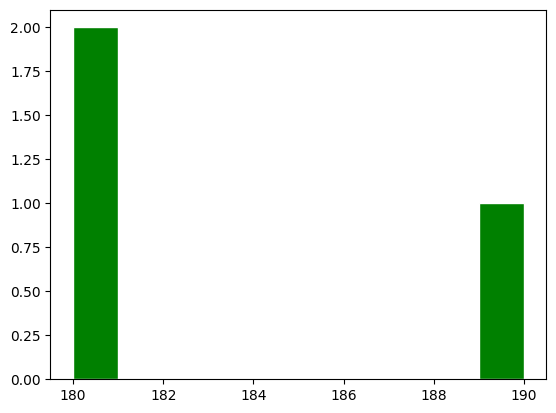

In [41]:
plt.hist(data, color="green", edgecolor='white', range=(180, 190))

### Plotting multiple datasets
To plot multiple datasets together to compare them you need to pass a list of datasets to `plt.hist()` and, preferably, add `plt.legend()` to make your plot easier to interpret.

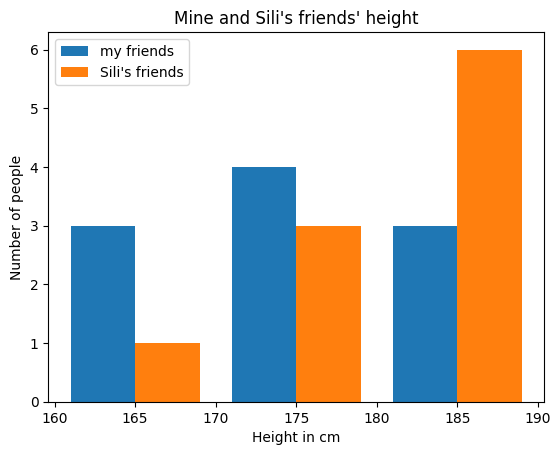

In [42]:
my_data = [163, 163, 164, 170, 170, 172, 173, 190,190,180]
sili_data = [161, 172, 174, 175, 181, 183, 186, 190,180,185]
bins = [160, 170, 180, 190]
names = ["my friends", "Sili's friends"]

plt.hist([my_data, sili_data], bins=bins, label=names)
plt.title("Mine and Sili's friends' height")
plt.ylabel("Number of people")
plt.xlabel("Height in cm")

plt.legend()
plt.show()

By default bars are placed side-by-side.The alternative way is to stack the values on top of each other. You can do that by setting the `stacked` argument to `True`. We also add `edgecolor` for better readability:

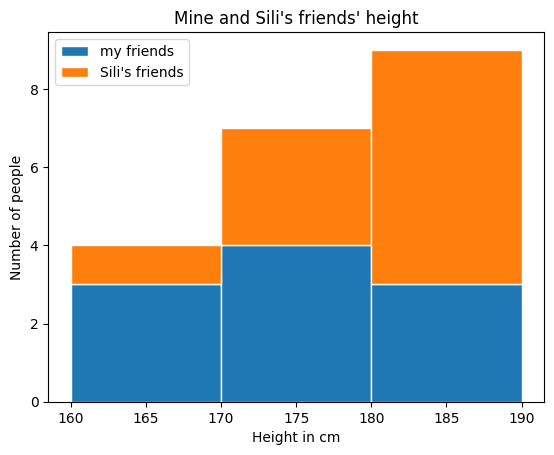

In [43]:
plt.hist([my_data, sili_data], bins=bins, label=names, stacked=True, edgecolor='white')
plt.title("Mine and Sili's friends' height")
plt.ylabel("Number of people")
plt.xlabel("Height in cm")

plt.legend()
plt.show()

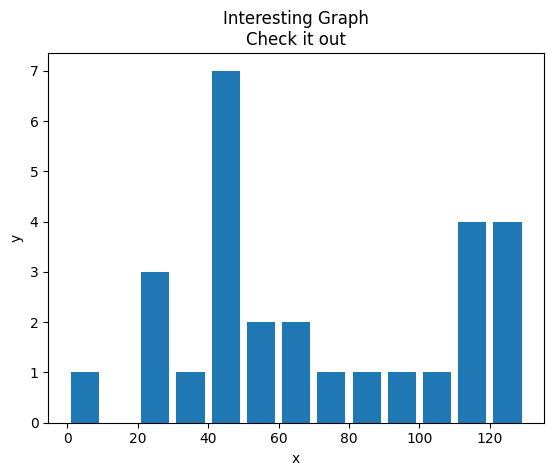

In [44]:
population_ages = [22,55,62,45,21,22,34,42,42,4,99,102,110,120,121,122,130,111,115,112,80,75,65,54,44,43,42,48]

bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]

plt.hist(population_ages, bins, histtype='bar', rwidth=0.8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.show()

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The Scatter Plots</h1>

A scatter plot is a visualization of how two variables relate to each other by using plots. It is widely used for its simplicity in building a chart.

### Creating scatter plots

We can create a scatter plot by using `plt.scatter()`, where the arguments are the two variables you wish to compare as input arguments. The `scatter()` function also takes the `s` parameter as an argument that specifies the marker size.

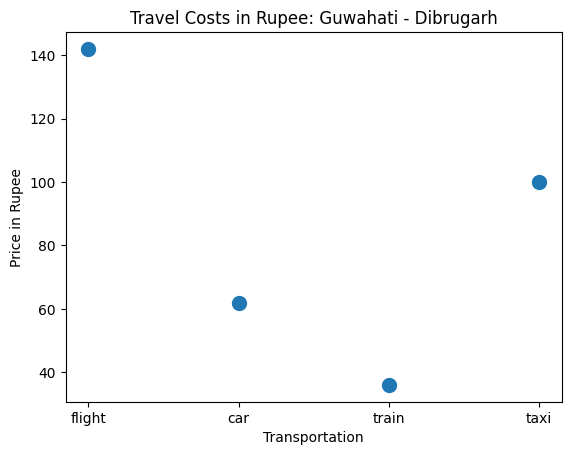

In [45]:
travel = ['flight', 'car', 'train', 'taxi']
price = [142, 62, 36, 100]
plt.title("Travel Costs in Rupee: Guwahati - Dibrugarh")
plt.xlabel("Transportation")
plt.ylabel("Price in Rupee")
plt.scatter(travel, price, s=100)
plt.show()

### Understanding the parameters

Here’s a summary of key points to remember about the main input parameters:

|Parameter|Description|
|---------|-----------|
|x and y|These parameters represent two variables we want to show the relationship.|
|s|Defines the marker size.|
|c|Represents the marker color.|
|marker|Customizes the shape of the marker.|
|cmap|Selects the mapping between values and colors.|
|alpha|This parameter is a float number and represents the transparency of the markers.|

### Changing the colors of the plots

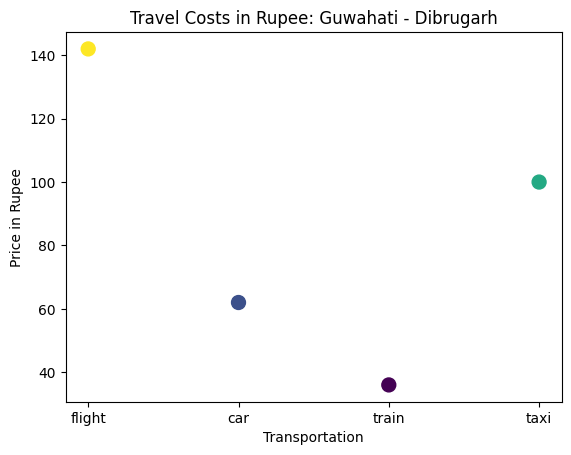

In [46]:
travel = ['flight', 'car', 'train', 'taxi']
price = [142, 62, 36, 100]
plt.title("Travel Costs in Rupee: Guwahati - Dibrugarh")
plt.xlabel("Transportation")
plt.ylabel("Price in Rupee")
plt.scatter(travel, price,c=price, s=100)
plt.show()

**Also, we may add a color bar to make more clear the visualization.**

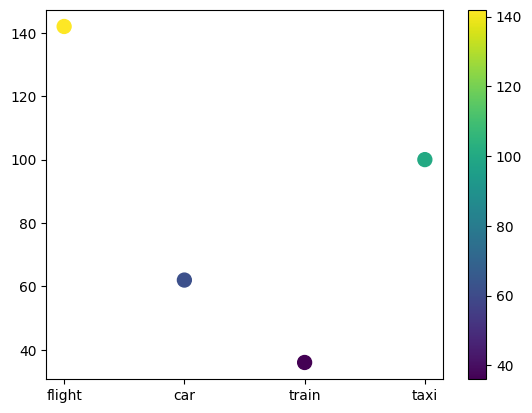

In [47]:
plt.scatter(travel, price, c=price, cmap='viridis', s=100)
plt.colorbar()

### Customizing the marker

We can choose to show different markers. Let's change the way of showing plots by changing the marker parameter.

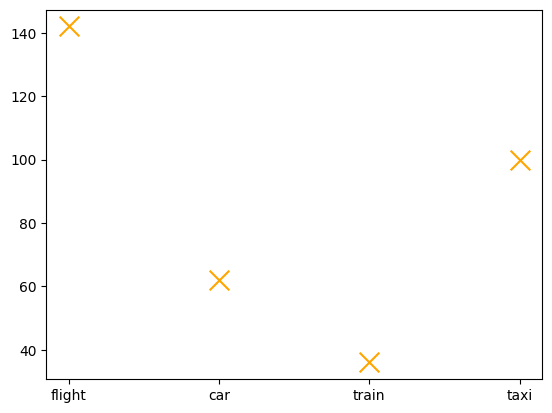

In [48]:
plt.scatter(travel, price, c='orange', marker='x', s=200)
plt.show()

<h1 style="text-align:center;background-color:skyblue;padding:10px;">The box plot</h1>

A **box plot** (also known as a **box-and-whisker** plot) is a convenient way to visualize the distributions of numerical data using quartiles. Box plots are widespread in descriptive statistics,they allow you to quickly explore one or more datasets.

## Box plot metrics
![Screenshot from 2021-10-01 14-45-23.png](attachment:1db355ac-23af-4e9f-a031-114f60949d15.png)

The summary metrics of a box plot are:

- The first and third quartiles (Q1 and Q3) that correspond to the 25th and 75th percentiles.
- An interquartile range (IQR) indicates the range of values from Q1 to Q3.
- A mean, the arithmetic average of all values.
- A median, the middle value of the data set.
- A minimum value excluding outliers. It is Q1−1.5×IQR
- A maximum value excluding outliers. It is Q3+1.5×IQR
- The outliers, or the observations that fall outside the 1.5×IQR rule. They are displayed as single points in line with whiskers.

The straight lines coming out of the box are whiskers. They indicate a degree of dispersion (also, variance) outside the first and third quartiles.

## Creating a box plot

The basic matplotlib syntax for plotting a box plot:

`plt.boxplot(data)`

where `data` is an array of data values.

There is a great number of optional arguments. Here are some of them:

- `vert`, if `False`, produces a horizontal box plot.
- `labels` is a sequence of strings that sets a label for each dataset.
- `showmeans`, if `True`, displays the mean values as a triangle on the box.
- `meanline`, if `True`, alongside with `showmeans=True` displays the mean as a line
- `boxprops`, `medianprops`, `meansprops`, `whiskerprops`, `capprops`, and `flierprops` allow us to change the properties of the box, median, mean, whiskers, caps, and outliers, respectively.

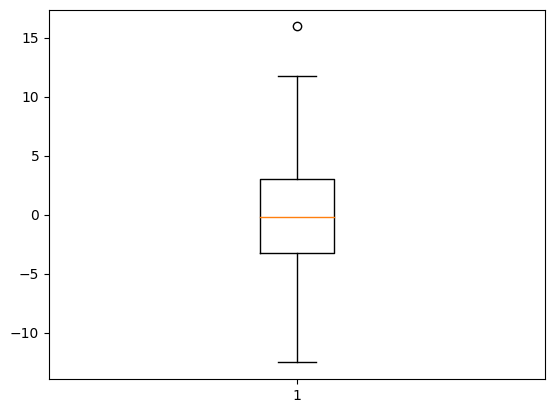

In [49]:
# set the numpy seed for results reproducibility
np.random.seed(23)
# generate data
data = np.random.normal(0, 5, size=400)
# create a boxplot
plt.boxplot(data)
plt.show()

## Horizontal box plot

To create a horizontal boxplot, you need to set the `vert` argument to `False`:

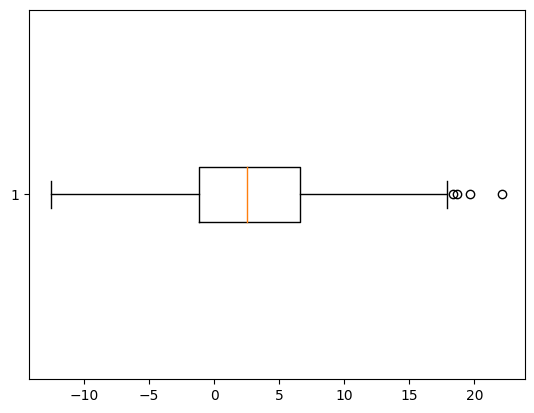

In [50]:
np.random.seed(23)
data = np.random.normal(3, 6, size=1000)
plt.boxplot(data, vert=False)
plt.show()

## Multiple box plots

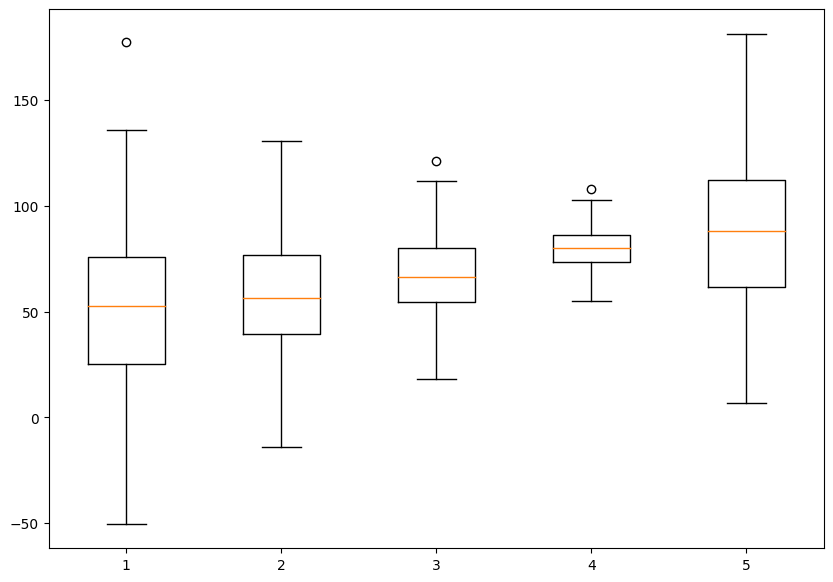

In [51]:
np.random.seed(23)

data_1 = np.random.normal(50, 40, 200)
data_2 = np.random.normal(60, 30, 200)
data_3 = np.random.normal(70, 20, 200)
data_4 = np.random.normal(80, 10, 200)
data_5 = np.random.normal(90, 35, 200)

data = [data_1, data_2, data_3, data_4, data_5]
plt.figure(figsize=(10, 7))
plt.boxplot(data)

plt.show()

## Box plot labels

To make the code a bit more readable, it is advised to create a separate list of labels and then pass it to the labels parameter. As for labeling the axes and giving a plot a title, it is a standard matplotlib procedure: you pass a string to the corresponding `plt.xlabel`, `plt.ylabel`, or `plt.title` parameter with an optional `fontsize` argument:

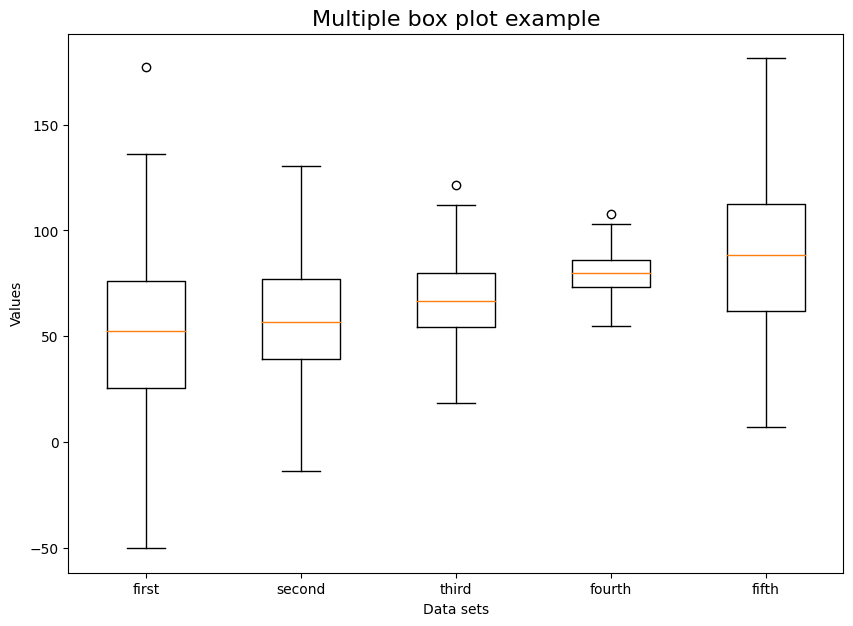

In [52]:
np.random.seed(23)

data_1 = np.random.normal(50, 40, 200)
data_2 = np.random.normal(60, 30, 200)
data_3 = np.random.normal(70, 20, 200)
data_4 = np.random.normal(80, 10, 200)
data_5 = np.random.normal(90, 35, 200)

data = [data_1, data_2, data_3, data_4, data_5]

plt.figure(figsize =(10, 7))

labels = ['first', 'second', 'third', 'fourth','fifth']
plt.boxplot(data, labels=labels)

plt.ylabel('Values')
plt.xlabel('Data sets')
plt.title('Multiple box plot example', fontsize=16)

plt.show()

## Box plot colors

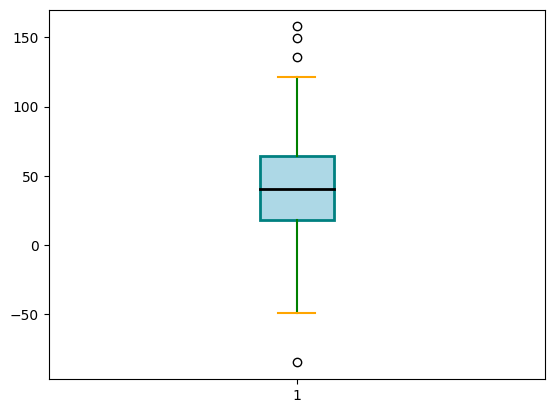

In [53]:
boxprops = {'facecolor': 'lightblue', 'edgecolor': 'teal', 'linewidth': 2.0}
whiskerprops = {'color': 'green', 'linewidth': 1.5}
capprops = {'color': 'orange', 'linewidth': 1.5}
medianprops = {'color': 'black', 'linewidth': 2}

np.random.seed(14)
data = np.random.normal(50, 40, size=200)

plt.boxplot(data,
            patch_artist=True,
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops)

plt.show()

Here is a list of some properties of a box plot that you can customize:

    boxprops = {'color': 'b', 'facecolor': 'none', 'linestyle': '-', 'linewidth': 1.0}

    medianprops = {'color': 'b', 'linestyle': '-', 'linewidth': 1.0}

    whiskerprops = {'color': 'b', 'linestyle': '-', 'linewidth': 1.0}

    capprops = {'color': 'b', 'linestyle': '-', 'linewidth': 1.0}

    flierprops = {'color': 'b', 'marker': 'o',
                  'markerfacecolor': 'none', 'markeredgecolor': 'k'}

    meanprops = {'color': 'b', 'linestyle': '-', 'linewidth': 1.0,
                 'marker': '^', 'markerfacecolor': 'g', 'markeredgecolor': 'k'}

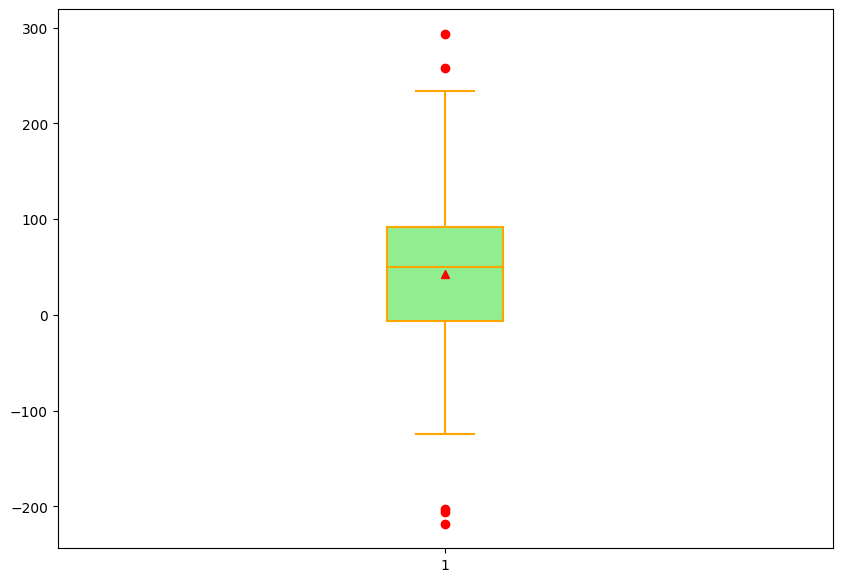

In [54]:
data = np.random.normal(50, 80, size=200)
plt.figure(figsize=(10, 7))
plot = plt.boxplot(data, patch_artist=True, showmeans=True)


edge_color = 'orange'
fill_color = 'lightgreen'
marker_color = 'red'

for prop in ['boxes', 'whiskers', 'means', 'medians', 'caps']:
    plt.setp(plot[prop], color=edge_color, linewidth=1.5)

for prop in ['boxes']:
    plt.setp(plot[prop], facecolor=fill_color)

for prop in ['fliers', 'means']:
    plt.setp(plot[prop], markerfacecolor=marker_color,
             markeredgecolor=marker_color)

plt.show()

### Stack Plots
 A stack plot is basically like a pie-chart, only over time.

Let's consider a situation where we have 24 hours in a day, and we'd like to see how we're spending our time. We'll divide our activities into: Sleeping, eating, working, and playing.

We're going to assume that we're tracking this over the course of 5 days, so our starting data will look like:

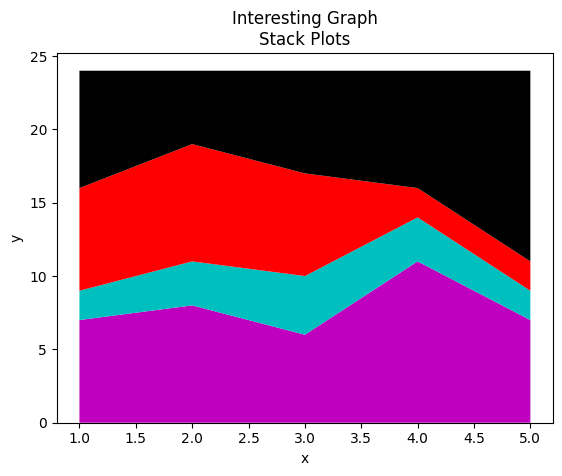

In [55]:
days = [1,2,3,4,5]

sleeping = [7,8,6,11,7]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,2]
playing =  [8,5,7,8,13]
plt.stackplot(days, sleeping,eating,working,playing, colors=['m','c','r','k'])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nStack Plots')
plt.show()

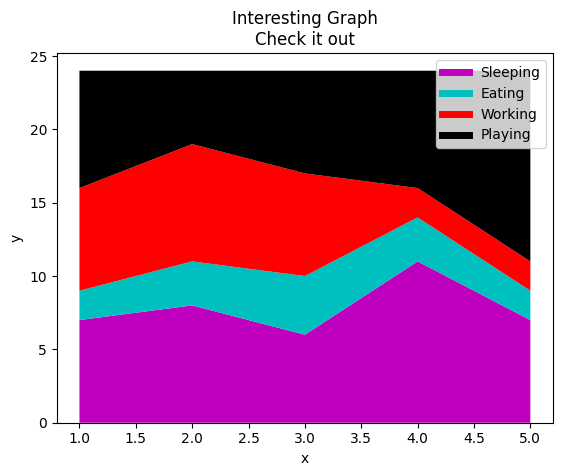

In [56]:
days = [1,2,3,4,5]

sleeping = [7,8,6,11,7]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,2]
playing =  [8,5,7,8,13]


plt.plot([],[],color='m', label='Sleeping', linewidth=5)
plt.plot([],[],color='c', label='Eating', linewidth=5)
plt.plot([],[],color='r', label='Working', linewidth=5)
plt.plot([],[],color='k', label='Playing', linewidth=5)

plt.stackplot(days, sleeping,eating,working,playing, colors=['m','c','r','k'])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

### 3D graphs

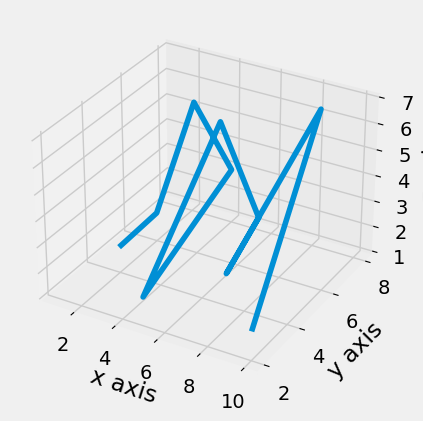

In [57]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x = [1,2,3,4,5,6,7,8,9,10]
y = [5,6,7,8,2,5,6,3,7,2]
z = [1,2,6,3,2,7,3,3,7,2]

ax1.plot(x,y,z)

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

### 3D Scatter Plot

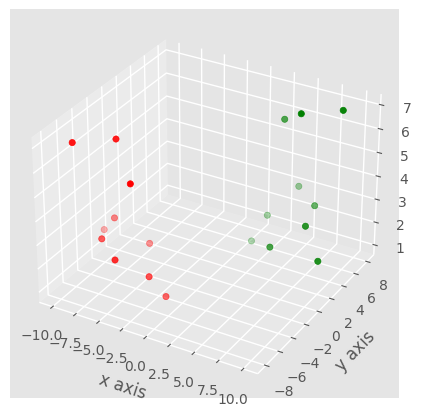

In [58]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x = [1,2,3,4,5,6,7,8,9,10]
y = [5,6,7,8,2,5,6,3,7,2]
z = [1,2,6,3,2,7,3,3,7,2]

x2 = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]
y2 = [-5,-6,-7,-8,-2,-5,-6,-3,-7,-2]
z2 = [1,2,6,3,2,7,3,3,7,2]

ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

### 3D Bar Chart

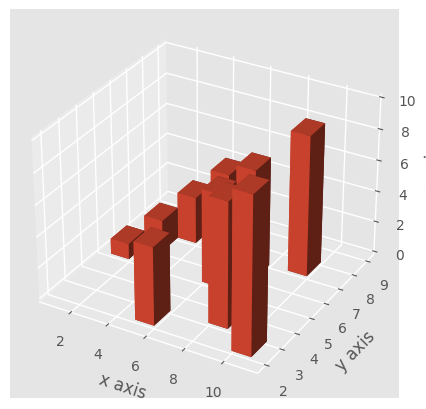

In [59]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,6,7,8,9,10]
y3 = [5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

ax1.bar3d(x3, y3, z3, dx, dy, dz)


ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

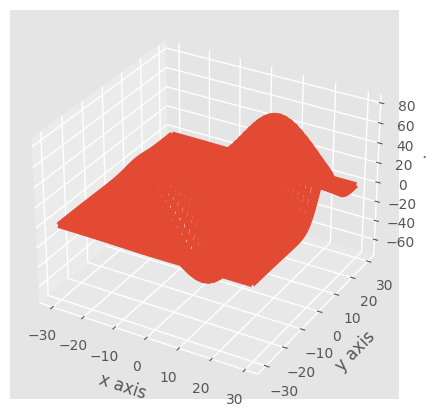

In [60]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x, y, z = axes3d.get_test_data()

ax1.plot_wireframe(x,y,z, rstride = 3, cstride = 3)

ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()

## Plotting Images
### Importing image data into Numpy arrays
Natively, Matplotlib only supports PNG images. [Pillow](https://pillow.readthedocs.io/en/latest/) library is very usefull for loading different kind of image data.


In [61]:
img = mpimg.imread('../input/stl10/unlabeled_images/unlabeled_image_png_30319.png')
print(img)

[[[0.58431375 0.6627451  0.54901963]
  [0.57254905 0.654902   0.5372549 ]
  [0.67058825 0.7254902  0.62352943]
  ...
  [0.5764706  0.64705884 0.5176471 ]
  [0.5882353  0.65882355 0.52156866]
  [0.54901963 0.6392157  0.4862745 ]]

 [[0.61960787 0.70980394 0.59607846]
  [0.62352943 0.7019608  0.5921569 ]
  [0.6156863  0.69803923 0.5882353 ]
  ...
  [0.5686275  0.6431373  0.5019608 ]
  [0.5764706  0.6431373  0.5019608 ]
  [0.56078434 0.6627451  0.5294118 ]]

 [[0.53333336 0.6392157  0.5294118 ]
  [0.50980395 0.6117647  0.49803922]
  [0.52156866 0.627451   0.5137255 ]
  ...
  [0.5686275  0.64705884 0.5058824 ]
  [0.54901963 0.627451   0.50980395]
  [0.5529412  0.6784314  0.5568628 ]]

 ...

 [[0.29803923 0.41960785 0.27058825]
  [0.3019608  0.40784314 0.25490198]
  [0.33333334 0.42352942 0.29803923]
  ...
  [0.3647059  0.42352942 0.3764706 ]
  [0.42352942 0.50980395 0.43529412]
  [0.5294118  0.61960787 0.5254902 ]]

 [[0.32156864 0.41568628 0.28627452]
  [0.30980393 0.39215687 0.2784314 ]


### Plotting numpy arrays as images

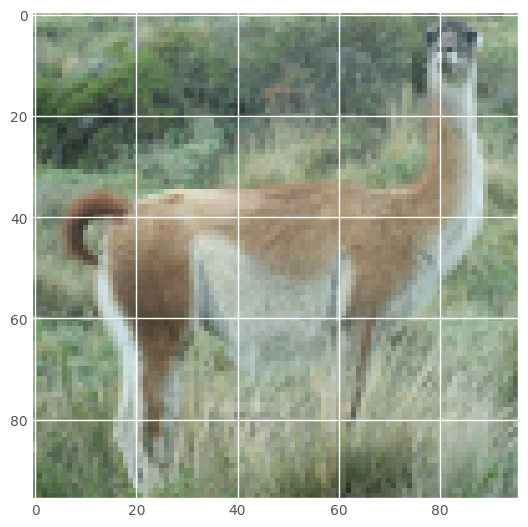

In [62]:
plt.figure(figsize=(10,6))
imgplot = plt.imshow(img)

### Applying pseudocolor schemes to image plots

Pseudocolor is a useful tool for enhancing contrast and visualizing data more easily. This is especially useful when making presentations of data using projectors - their contrast is typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity images. We currently have an RGB image. Since R, G, and B are all similar, we can just pick one channel of our data:

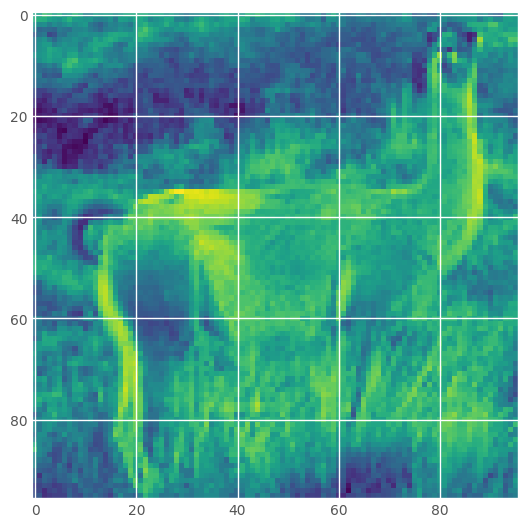

In [63]:
plt.figure(figsize=(10,6))
lum_img = img[:, :, 0]
plt.imshow(lum_img)

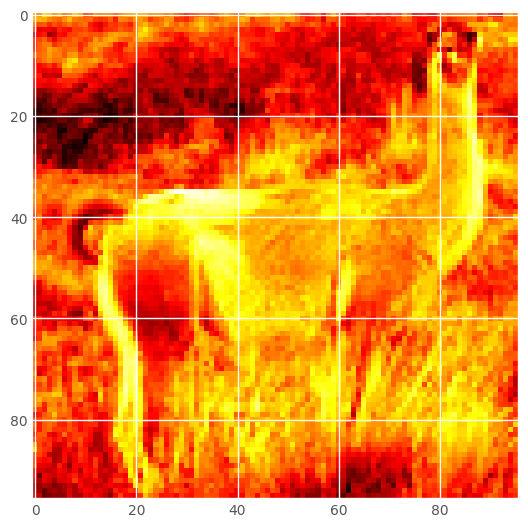

In [64]:
plt.figure(figsize=(10,6))
plt.imshow(lum_img, cmap="hot")

Change colormaps on existing plot objects using the set_cmap() method:

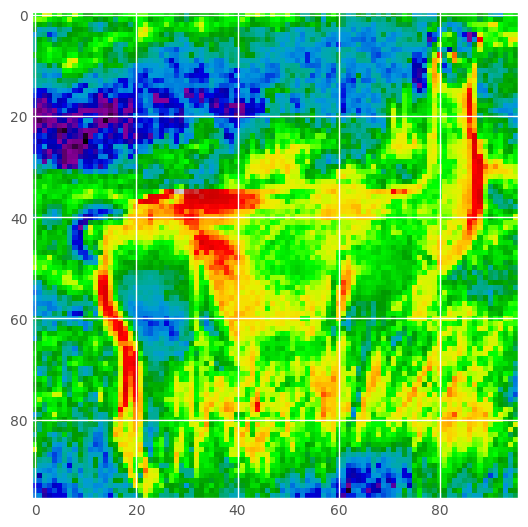

In [65]:
plt.figure(figsize=(10,6))
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

### Color scale

It's helpful to have an idea of what value a color represents. We can do that by adding color bars.

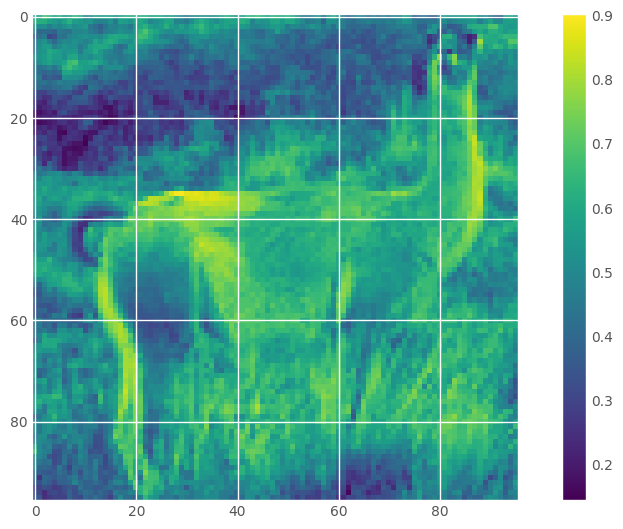

In [66]:
plt.figure(figsize=(10,6))
imgplot = plt.imshow(lum_img)
plt.colorbar()

### Examining a specific data range
To enhance the contrast in image, or expand the contrast in a particular region while sacrificing the detail in colors that don't vary much, or don't matter. A good tool to find interesting regions is the histogram. To create a histogram of image data, we use the `hist()` function.

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   4.,   0.,   2.,   2.,
          1.,   6.,   8.,   8.,   4.,   2.,   5.,   8.,   2.,   9.,   7.,
          4.,   9.,  11.,  11.,   4.,  11.,  15.,   7.,  15.,  21.,  17.,
         16.,  22.,  25.,  10.,  24.,  24.,  23.,  21.,  30.,  24.,  26.,
         26.,  36.,  29.,  30.,  29.,  27.,  35.,  39.,  49.,  44.,  49.,
         57.,  44.,  61.,  63.,  47.,  48.,  57.,  42.,  54.,  53.,  58.,
         60.,  58.,  57.,  56.,  60.,  67.,  62.,  60.,  72.,  66.,  61.,
         74.,  69.,  72.,  74.,  83.,  80.,  76.,  67.,  85.,  80.,  71.,
         68.,  85.,  86.,  78., 102.,  76.,  90.,  84.,  87.,  82.,  79.,
         92.,  89.,  85.,  99., 112.,  81.,  89.,  94., 111., 107., 105.,
        116., 108.,  90., 103., 101., 

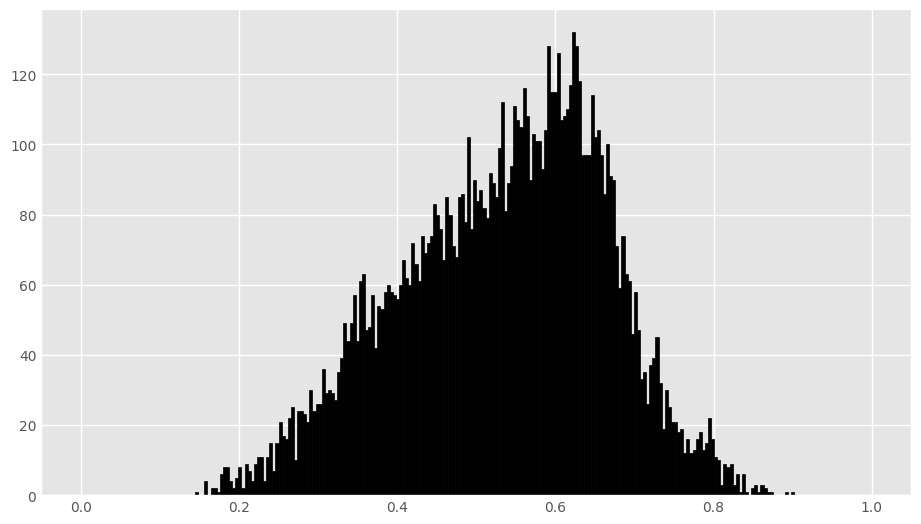

In [67]:
plt.figure(figsize=(10,6))
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

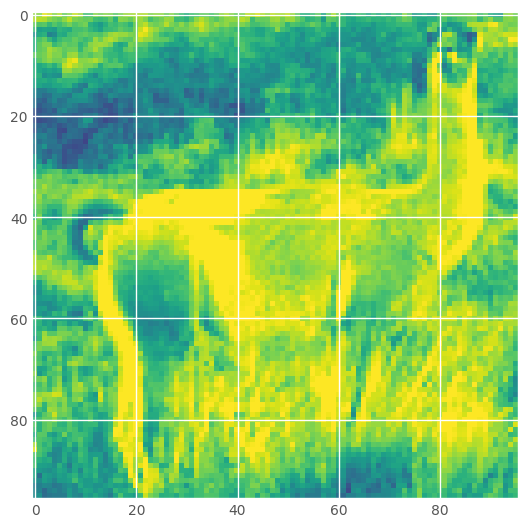

In [68]:
plt.figure(figsize=(10,6))
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

Specify the clim using the returned object

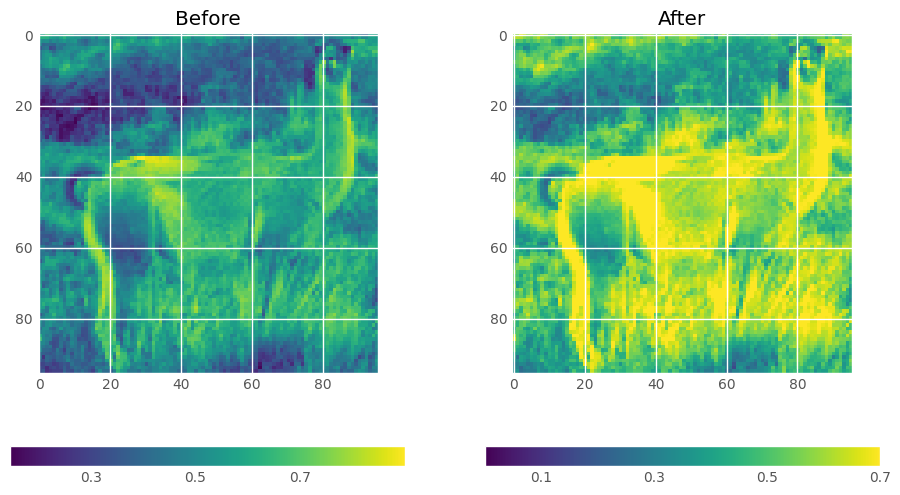

In [69]:
fig = plt.figure(figsize=(10,6))
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
a.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
a.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

### Array Interpolation schemes

Interpolation calculates what the color or value of a pixel "should" be, according to different mathematical schemes. One common place that this happens is when you resize an image. The number of pixels change, but you want the same information. Since pixels are discrete, there's missing space. Interpolation is how you fill that space. This is why your images sometimes come out looking pixelated when you blow them up. The effect is more pronounced when the difference between the original image and the expanded image is greater. Let's take our image and shrink it. We're effectively discarding pixels, only keeping a select few. Now when we plot it, that data gets blown up to the size on your screen. The old pixels aren't there anymore, and the computer has to draw in pixels to fill that space.

<ipython-input-70-3fbcbf4e180c>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place


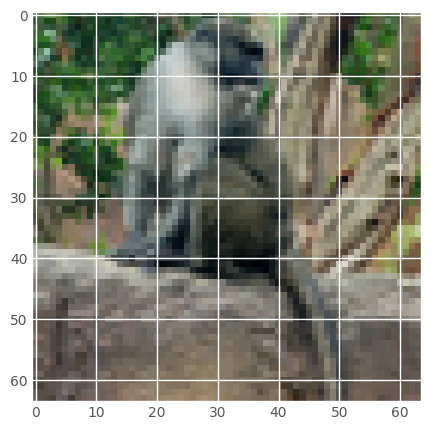

In [70]:
from PIL import Image

img = Image.open('../input/stl10/unlabeled_images/unlabeled_image_png_51042.png')
img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img)

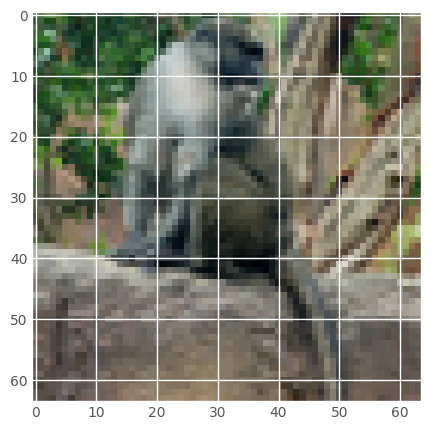

In [71]:
imgplot = plt.imshow(img, interpolation="nearest")


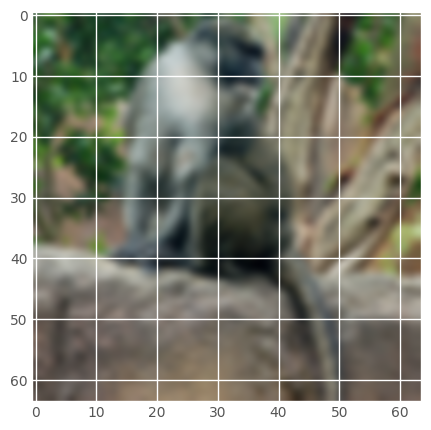

In [72]:
imgplot = plt.imshow(img, interpolation="bicubic")